# 1) Download dataset

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge

Dataset URL: https://www.kaggle.com/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge
License(s): CC0-1.0
  0% 0.00/2.07M [00:00<?, ?B/s]
100% 2.07M/2.07M [00:00<00:00, 82.9MB/s]


In [ ]:
! unzip of-genomes-and-genetics-hackerearth-ml-challenge.zip

Archive:  of-genomes-and-genetics-hackerearth-ml-challenge.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 2) Install and Import Libraries

### 2.2) Old

In [ ]:
# Basic and Statistic
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

# Supervised classifier model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Unsupervised model
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, NMF

#deep learning
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import time
import matplotlib.pyplot as plt
import itertools
!pip install missingno

#3) Data Engineering

##3.1) Data import

In [ ]:
dataset = pd.read_csv('train.csv')
dataset.head()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   
2         NaN        Nashon  ...       Singular   
3   Hoelscher        Aayaan  ...       Singular   
4    Stutzman         Suave  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   
2                                               NaN            normal   
3                                          7.919321      inconclusive   
4                                          4.098210               NaN   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   
2       0.0       1.0       1.0       1.0        1.0   
3       0.0       0.0       1.0       0.0        0.0   
4       0.0       0.0       0.0       0.0        NaN   

                               Genetic Disorder  \
0   Mitochondrial genetic inheritance disorders   
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 45 columns]

##3.2) Data cleaning

###3.2.1) Removing unwanted featuers

In [ ]:
dataset.drop(['Patient Id','Patient First Name','Family Name',"Father's name", 'Institute Name','Location of Institute'],axis=1,inplace=True)
dataset.drop(['Test 1','Test 2','Test 3','Test 4','Test 5','Parental consent','Autopsy shows birth defect (if applicable)','Place of birth'],axis=1,inplace=True)
dataset.drop(['Status','Follow-up'],axis=1,inplace=True)

In [ ]:
dataset.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Gender', 'Birth asphyxia',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

### 3.2.2) Rename column

In [ ]:
dataset.rename(columns={"Patient Age":"Patient_Age",
                        "Inherited from father":"Inherited_Father",
                        "Maternal gene":"Maternal_Gene",
                        "Genes in mother's side":"Genes_Mother_Side",
                        "Paternal gene":"Paternal_Gene",
                        "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                        "Disorder Subclass": "Disorder_Subclass",
                    "Genetic Disorder":"Genetic_Disorder"},inplace=True)

##3.3) Preprocessing

### 3.3.1) No Values

In [ ]:
categorical_col = []
for col in dataset :
    if dataset[col].dtypes == 'object' :
        categorical_col.append(col)
    else :
        None
categorical_col = categorical_col[1:]
categorical_col = np.array(categorical_col)
categorical_col

array(['Inherited_Father', 'Maternal_Gene', 'Paternal_Gene',
       'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min', 'Gender',
       'Birth_Asphyxia', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Birth_Defects',
       'Blood_Test_Result', 'Genetic_Disorder', 'Disorder_Subclass'],
      dtype='<U28')

In [ ]:
for col in categorical_col :
    print(dataset[col].value_counts())

Inherited_Father
No     13133
Yes     8644
Name: count, dtype: int64
Maternal_Gene
Yes    10647
No      8626
Name: count, dtype: int64
Paternal_Gene
No     12508
Yes     9575
Name: count, dtype: int64
Respiratory_Rate_Breaths_Min
Normal (30-60)    10065
Tachypnea          9869
Name: count, dtype: int64
Heart_Rates_Min
Normal         10187
Tachycardia     9783
Name: count, dtype: int64
Gender
Ambiguous    6695
Male         6666
Female       6549
Name: count, dtype: int64
Birth_Asphyxia
Yes              5106
No record        5008
Not available    4986
No               4844
Name: count, dtype: int64
Folic_Acid
Yes    10087
No      9879
Name: count, dtype: int64
Maternal_Illness
No     10012
Yes     9919
Name: count, dtype: int64
Radiation_Exposure
Not applicable    5029
No                5005
Yes               4980
-                 4916
Name: count, dtype: int64
Substance_Abuse
-                 5042
No                5033
Yes               4975
Not applicable    4838
Name: count, dtype:

In [ ]:
dataset[categorical_col] = dataset[categorical_col].replace({'Not available':'No', 'No record':'No', 'Not applicable':'No', 'None':'No', '-':'No'})
for col in categorical_col :
    print(dataset[col].value_counts())

Inherited_Father
No     13133
Yes     8644
Name: count, dtype: int64
Maternal_Gene
Yes    10647
No      8626
Name: count, dtype: int64
Paternal_Gene
No     12508
Yes     9575
Name: count, dtype: int64
Respiratory_Rate_Breaths_Min
Normal (30-60)    10065
Tachypnea          9869
Name: count, dtype: int64
Heart_Rates_Min
Normal         10187
Tachycardia     9783
Name: count, dtype: int64
Gender
Ambiguous    6695
Male         6666
Female       6549
Name: count, dtype: int64
Birth_Asphyxia
No     14838
Yes     5106
Name: count, dtype: int64
Folic_Acid
Yes    10087
No      9879
Name: count, dtype: int64
Maternal_Illness
No     10012
Yes     9919
Name: count, dtype: int64
Radiation_Exposure
No     14950
Yes     4980
Name: count, dtype: int64
Substance_Abuse
No     14913
Yes     4975
Name: count, dtype: int64
Assisted_Conception
Yes    10012
No      9949
Name: count, dtype: int64
History_Previous_Pregnancies
Yes    10082
No      9829
Name: count, dtype: int64
Birth_Defects
Singular    9977
Mul

### 3.2) Missing value

In [ ]:
print("DUPLICATED VALUES:\n")
print(dataset.duplicated().sum())

DUPLICATED VALUES:

0


In [ ]:
print("NAN VALUES BEFORE:\n")
print(dataset.isna().sum())

NAN VALUES BEFORE:

Patient_Age                     1427
Genes_Mother_Side                  0
Inherited_Father                 306
Maternal_Gene                   2810
Paternal_Gene                      0
Blood_Cell_mcL                     0
Mother_Age                      6036
Father_Age                      5986
Respiratory_Rate_Breaths_Min    2149
Heart_Rates_Min                 2113
Gender                          2173
Birth_Asphyxia                  2139
Folic_Acid                      2117
Maternal_Illness                2152
Radiation_Exposure              2153
Substance_Abuse                 2195
Assisted_Conception             2122
History_Previous_Pregnancies    2172
Previous_Abortion               2162
Birth_Defects                   2154
White_Blood_Cell                2148
Blood_Test_Result               2145
Symptom 1                       2155
Symptom 2                       2222
Symptom 3                       2101
Symptom 4                       2113
Symptom 5         

In [ ]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
Patient_Age                                    Patient_Age         6.461984
Genes_Mother_Side                        Genes_Mother_Side         0.000000
Inherited_Father                          Inherited_Father         1.385681
Maternal_Gene                                Maternal_Gene        12.724720
Paternal_Gene                                Paternal_Gene         0.000000
Blood_Cell_mcL                              Blood_Cell_mcL         0.000000
Mother_Age                                      Mother_Age        27.333243
Father_Age                                      Father_Age        27.106824
Respiratory_Rate_Breaths_Min  Respiratory_Rate_Breaths_Min         9.731468
Heart_Rates_Min                            Heart_Rates_Min         9.568446
Gender                                              Gender         9.840149
Birth_Asphyxia                              Birth_Asphyxia         9.686184
Folic_Acid                                      Folic_Acid         9.586560
Maternal_Illness                          Maternal_Illness         9.745053
Radiation_Exposure                      Radiation_Exposure         9.749581
Substance_Abuse                            Substance_Abuse         9.939773
Assisted_Conception                    Assisted_Conception         9.609202
History_Previous_Pregnancies  History_Previous_Pregnancies         9.835620
Previous_Abortion                        Previous_Abortion         9.790336
Birth_Defects                                Birth_Defects         9.754109
White_Blood_Cell                          White_Blood_Cell         9.726939
Blood_Test_Result                        Blood_Test_Result         9.713354
Symptom 1                                        Symptom 1         9.758638
Symptom 2                                        Symptom 2        10.062039
Symptom 3                                        Symptom 3         9.514106
Symptom 4                                        Symptom 4         9.568446
Symptom 5                                        Symptom 5         9.749581
Genetic_Disorder                          Genetic_Disorder         9.717883
Disorder_Subclass                        Disorder_Subclass         9.817507

<Axes: xlabel='column_name'>

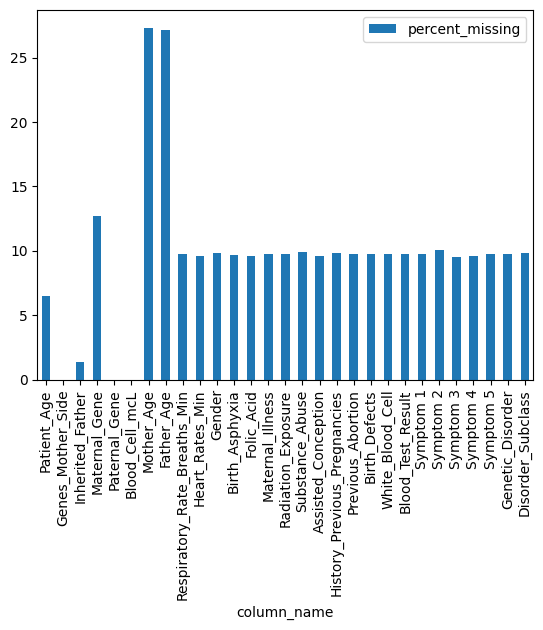

In [ ]:
missing_value_df.plot(x='column_name', y='percent_missing', kind='bar')

<ipython-input-20-5b27eceafe07>:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


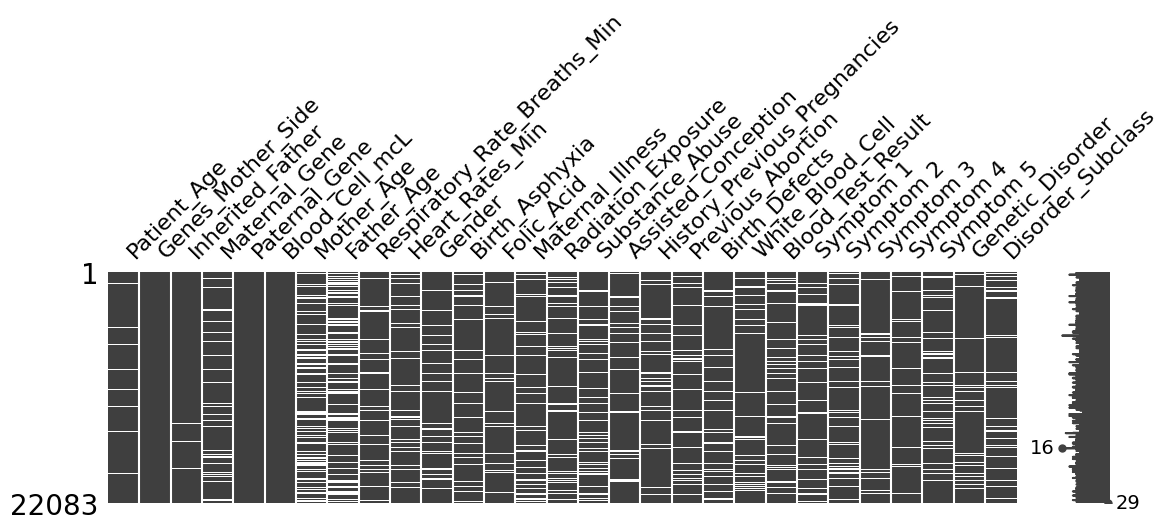

In [ ]:
import missingno as msno
msno.matrix(dataset,figsize=(13,3))
plt.tight_layout()
plt.show()

<ipython-input-21-774f150acf71>:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


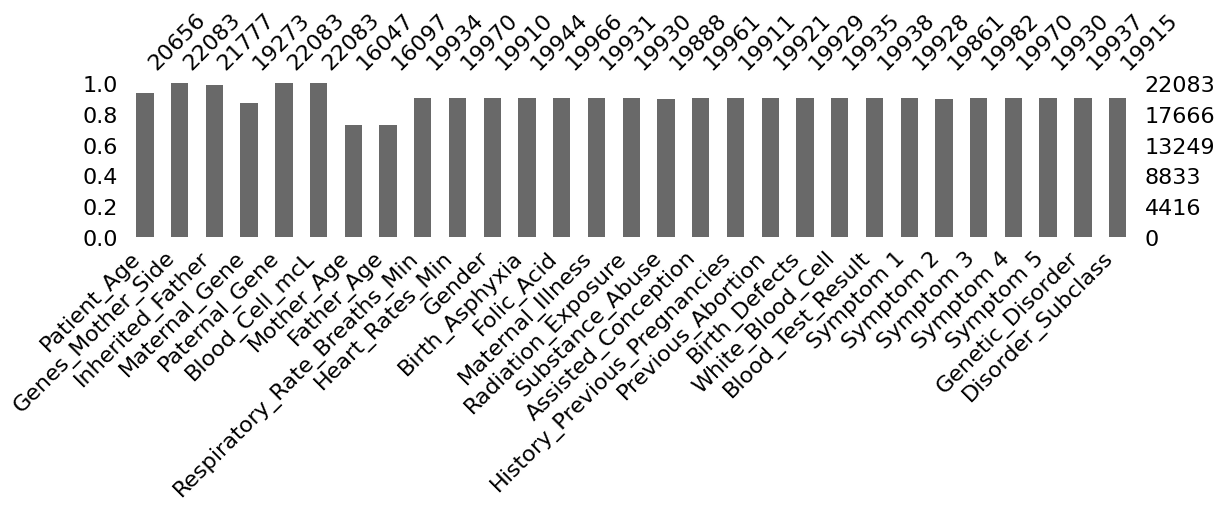

In [ ]:
msno.bar(dataset,figsize=(13,2))
plt.tight_layout()
plt.show()

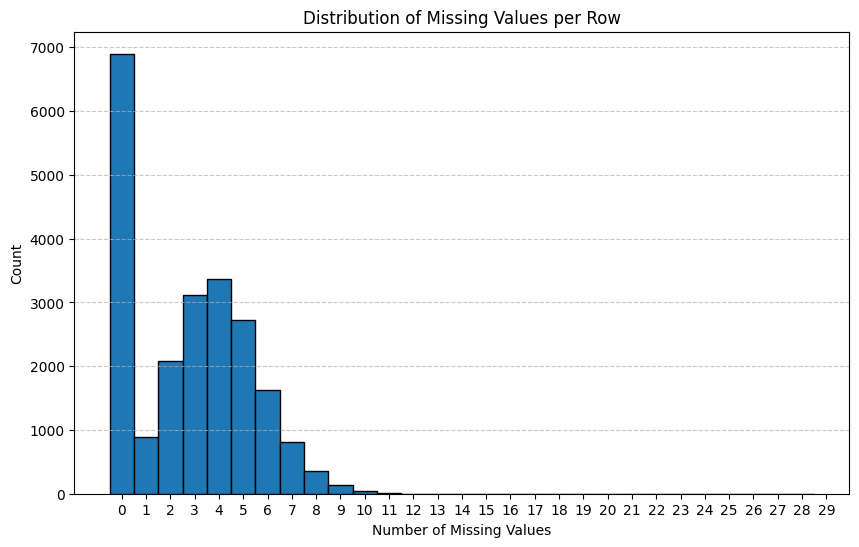

In [ ]:
missing_values_count = dataset.isnull().sum(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(missing_values_count, bins=range(0, 30), align='left', edgecolor='black')
plt.xlabel('Number of Missing Values')
plt.ylabel('Count')
plt.title('Distribution of Missing Values per Row')
plt.xticks(range(0, 30))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
dataset_drop = dataset.copy()
dataset_fill = dataset.copy()

In [ ]:
dataset_drop = dataset_drop.dropna()
print("Shape of cleaned dataset:", dataset_drop.shape)

Shape of cleaned dataset: (6900, 29)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numerical_cols = dataset_fill.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = dataset_fill.select_dtypes(include=['object']).columns
dataset_fill[numerical_cols] = imputer.fit_transform(dataset_fill[numerical_cols])
dataset_fill.dropna(inplace=True)

In [ ]:
print("NAN VALUES AFTER:\n")
print(dataset_fill.isna().sum())
print("Shape of filled dataset:", dataset_fill.shape)

NAN VALUES AFTER:

Patient_Age                     0
Genes_Mother_Side               0
Inherited_Father                0
Maternal_Gene                   0
Paternal_Gene                   0
Blood_Cell_mcL                  0
Mother_Age                      0
Father_Age                      0
Respiratory_Rate_Breaths_Min    0
Heart_Rates_Min                 0
Gender                          0
Birth_Asphyxia                  0
Folic_Acid                      0
Maternal_Illness                0
Radiation_Exposure              0
Substance_Abuse                 0
Assisted_Conception             0
History_Previous_Pregnancies    0
Previous_Abortion               0
Birth_Defects                   0
White_Blood_Cell                0
Blood_Test_Result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4                       0
Symptom 5                       0
Genetic_Disorder                0
Disorder_Subclass            

###3.3.3) Outliers

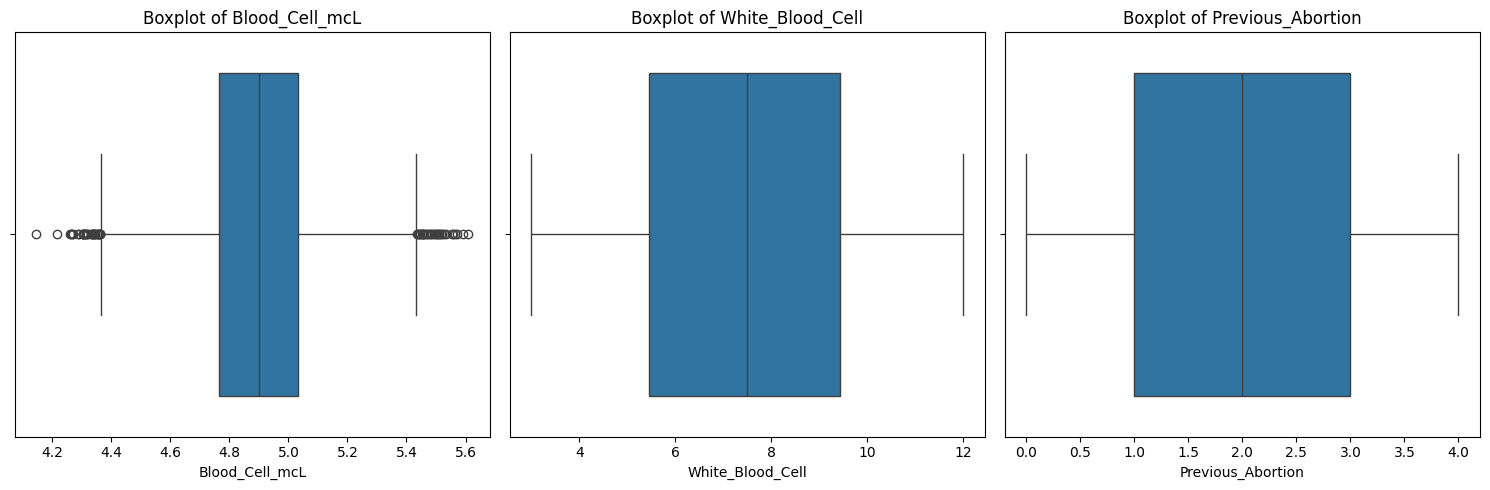

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Blood_Cell_mcL', 'White_Blood_Cell', 'Previous_Abortion']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=dataset_fill[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
#outliers
print('Fill Outliers:')
for i in ('Blood_Cell_mcL','White_Blood_Cell','Previous_Abortion'):
    Q1 = dataset_fill[i].quantile(0.25)
    Q3 = dataset_fill[i].quantile(0.75)
    IQR = Q3 - Q1
    print(i,'-',((dataset_fill[i] < (Q1 - 1.5 * IQR)) | (dataset_fill[i] > (Q3 + 1.5 * IQR))).sum())

Fill Outliers:
Blood_Cell_mcL - 65
White_Blood_Cell - 0
Previous_Abortion - 0


In [ ]:
# Columns with potential outliers
columns_with_outliers = ['Blood_Cell_mcL']

# Remove outliers from each column
for column in columns_with_outliers:
    Q1 = dataset_fill[column].quantile(0.25)
    Q3 = dataset_fill[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset_fill = dataset_fill[(dataset_fill[column] >= lower_bound) & (dataset_fill[column] <= upper_bound)]

# Display the shape of the dataset after removing outliers
print("Shape of dataset after removing outliers (Fill):", dataset_fill.shape)

Shape of dataset after removing outliers (Fill): (8192, 29)


##3.4) Feature Engineering

In [ ]:
dataset_encode_fill = dataset_drop.copy()
Encode_Func_fill = LabelEncoder()
dataset_encode_fill["Genes_Mother_Side"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Genes_Mother_Side"])
dataset_encode_fill["Inherited_Father"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Inherited_Father"])
dataset_encode_fill["Maternal_Gene"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Maternal_Gene"])
dataset_encode_fill["Paternal_Gene"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Paternal_Gene"])
dataset_encode_fill["Respiratory_Rate_Breaths_Min"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Respiratory_Rate_Breaths_Min"])
dataset_encode_fill["Heart_Rates_Min"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Heart_Rates_Min"])
dataset_encode_fill["Gender"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Gender"])
dataset_encode_fill["Birth_Asphyxia"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Birth_Asphyxia"])
dataset_encode_fill["Folic_Acid"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Folic_Acid"])
dataset_encode_fill["Maternal_Illness"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Maternal_Illness"])
dataset_encode_fill["Radiation_Exposure"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Radiation_Exposure"])
dataset_encode_fill["Substance_Abuse"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Substance_Abuse"])
dataset_encode_fill["Assisted_Conception"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Assisted_Conception"])
dataset_encode_fill["History_Previous_Pregnancies"] = Encode_Func_fill.fit_transform(dataset_encode_fill["History_Previous_Pregnancies"])
dataset_encode_fill["Birth_Defects"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Birth_Defects"])
dataset_encode_fill["Blood_Test_Result"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Blood_Test_Result"])
dataset_encode_fill["Disorder_Subclass"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Disorder_Subclass"])
###
dataset_fill["Disorder_Subclass"] = Encode_Func_fill.fit_transform(dataset_fill["Disorder_Subclass"])
###
dataset_encode_fill["Genetic_Disorder"] = Encode_Func_fill.fit_transform(dataset_encode_fill["Genetic_Disorder"])
Encode_Data = dataset_encode_fill.astype("int")

In [ ]:
dataset_encode_drop = dataset_drop.copy()
Encode_Func_drop = LabelEncoder()
dataset_encode_drop["Genes_Mother_Side"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Genes_Mother_Side"])
dataset_encode_drop["Inherited_Father"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Inherited_Father"])
dataset_encode_drop["Maternal_Gene"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Maternal_Gene"])
dataset_encode_drop["Paternal_Gene"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Paternal_Gene"])
dataset_encode_drop["Respiratory_Rate_Breaths_Min"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Respiratory_Rate_Breaths_Min"])
dataset_encode_drop["Heart_Rates_Min"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Heart_Rates_Min"])
dataset_encode_drop["Gender"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Gender"])
dataset_encode_drop["Birth_Asphyxia"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Birth_Asphyxia"])
dataset_encode_drop["Folic_Acid"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Folic_Acid"])
dataset_encode_drop["Maternal_Illness"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Maternal_Illness"])
dataset_encode_drop["Radiation_Exposure"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Radiation_Exposure"])
dataset_encode_drop["Substance_Abuse"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Substance_Abuse"])
dataset_encode_drop["Assisted_Conception"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Assisted_Conception"])
dataset_encode_drop["History_Previous_Pregnancies"] = Encode_Func_drop.fit_transform(dataset_encode_drop["History_Previous_Pregnancies"])
dataset_encode_drop["Birth_Defects"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Birth_Defects"])
dataset_encode_drop["Blood_Test_Result"] = Encode_Func_drop.fit_transform(dataset_encode_drop["Blood_Test_Result"])


dataset_encode_drop["Disorder_Subclass"]=[1 if i.strip()== "Leber's hereditary optic neuropathy"
                                else 0 if i.strip() == "Cystic fibrosis"
                               else 2 if i.strip()=="Diabetes"
                               else 3 if i.strip()=="Leigh syndrome"
                               else 4 if i.strip()=="Cancer"
                               else 5 if i.strip()=="Tay-Sachs"
                               else 6 if i.strip()=="Hemochromatosis"
                               else 7 if i.strip()=="Mitochondrial myopathy"
                               else 8 for i in dataset_encode_drop["Disorder_Subclass"]]

dataset_encode_drop["Genetic_Disorder"]=[1 if i.strip()== "Mitochondrial genetic inheritance disorders" else 0 if i.strip() == "Multifactorial genetic inheritance disorders" else 2 for i in dataset_encode_drop["Genetic_Disorder"]]

## 3.5) Featuer Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy import stats

X = dataset_encode_fill[['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']]
y = dataset_encode_fill['Genetic_Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_individual = RandomForestClassifier(random_state=42)
rf_individual.fit(X_train, y_train)
y_pred_individual = rf_individual.predict(X_test)
accuracy_individual = accuracy_score(y_test, y_pred_individual)

X_train_avg = X_train.mean(axis=1).to_frame()
X_test_avg = X_test.mean(axis=1).to_frame()
rf_avg = RandomForestClassifier(random_state=42)
rf_avg.fit(X_train_avg, y_train)
y_pred_avg = rf_avg.predict(X_test_avg)
accuracy_avg = accuracy_score(y_test, y_pred_avg)

# Compare the accuracy of both approaches using a statistical test
_, p_value = stats.ttest_rel(y_pred_individual, y_pred_avg)

# Print results
print(f"Accuracy with individual symptoms: {accuracy_individual}")
print(f"Accuracy with average of symptoms: {accuracy_avg}")
print(f"P-value of paired t-test: {p_value}")

# Make decision based on p-value
if p_value < 0.05:
    print("There is a significant difference in predictive performance.")
    print("Consider using the approach with higher accuracy.")
else:
    print("There is no significant difference in predictive performance.")
    print("Either approach may be suitable.")

Accuracy with individual symptoms: 0.6108695652173913
Accuracy with average of symptoms: 0.6123188405797102
P-value of paired t-test: 0.2685356211524673
There is no significant difference in predictive performance.
Either approach may be suitable.


In [ ]:
dataset_encode_fill["Total_symptom"]=(dataset_encode_fill["Symptom 1"]+dataset_encode_fill["Symptom 2"]+dataset_encode_fill["Symptom 3"]+dataset_encode_fill["Symptom 4"]+dataset_encode_fill["Symptom 5"]) / 5
dataset_encode_fill.drop(columns=["Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5"], inplace=True)
dataset_encode_fill.head()

Patient_Age  Genes_Mother_Side  Inherited_Father  Maternal_Gene  \
8          11.0                  0                 0              1   
9           4.0                  0                 1              1   
12          1.0                  1                 1              0   
14          6.0                  1                 0              1   
18         10.0                  1                 1              1   

    Paternal_Gene  Blood_Cell_mcL  Mother_Age  Father_Age  \
8               0        5.209058        45.0        44.0   
9               1        4.752272        44.0        42.0   
12              0        4.612265        50.0        56.0   
14              0        4.620420        41.0        20.0   
18              0        4.751452        40.0        57.0   

    Respiratory_Rate_Breaths_Min  Heart_Rates_Min  ...  Substance_Abuse  \
8                              1                1  ...                0   
9                              1                1  ...                0   
12                             0                1  ...                0   
14                             1                1  ...                0   
18                             0                1  ...                0   

    Assisted_Conception  History_Previous_Pregnancies  Previous_Abortion  \
8                     0                             1                0.0   
9                     1                             1                1.0   
12                    1                             1                0.0   
14                    0                             0                3.0   
18                    1                             1                3.0   

    Birth_Defects  White_Blood_Cell  Blood_Test_Result  Genetic_Disorder  \
8               0          6.669552                  3                 0   
9               0          6.397702                  0                 1   
12              1          7.995115                  3                 0   
14              0          3.000000                  3                 0   
18              1          9.382407                  0                 0   

    Disorder_Subclass  Total_symptom  
8                   6            0.8  
9                   3            0.6  
12                  6            0.6  
14                  6            0.6  
18                  7            0.4  

[5 rows x 25 columns]

In [ ]:
dataset_encode_drop["Total_symptom"]=(dataset_encode_drop["Symptom 1"]+dataset_encode_drop["Symptom 2"]+dataset_encode_drop["Symptom 3"]+dataset_encode_drop["Symptom 4"]+dataset_encode_drop["Symptom 5"]) / 5
dataset_encode_drop.drop(columns=["Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5"], inplace=True)
dataset_encode_drop.head()

Patient_Age  Genes_Mother_Side  Inherited_Father  Maternal_Gene  \
8          11.0                  0                 0              1   
9           4.0                  0                 1              1   
12          1.0                  1                 1              0   
14          6.0                  1                 0              1   
18         10.0                  1                 1              1   

    Paternal_Gene  Blood_Cell_mcL  Mother_Age  Father_Age  \
8               0        5.209058        45.0        44.0   
9               1        4.752272        44.0        42.0   
12              0        4.612265        50.0        56.0   
14              0        4.620420        41.0        20.0   
18              0        4.751452        40.0        57.0   

    Respiratory_Rate_Breaths_Min  Heart_Rates_Min  ...  Substance_Abuse  \
8                              1                1  ...                0   
9                              1                1  ...                0   
12                             0                1  ...                0   
14                             1                1  ...                0   
18                             0                1  ...                0   

    Assisted_Conception  History_Previous_Pregnancies  Previous_Abortion  \
8                     0                             1                0.0   
9                     1                             1                1.0   
12                    1                             1                0.0   
14                    0                             0                3.0   
18                    1                             1                3.0   

    Birth_Defects  White_Blood_Cell  Blood_Test_Result  Genetic_Disorder  \
8               0          6.669552                  3                 1   
9               0          6.397702                  0                 0   
12              1          7.995115                  3                 1   
14              0          3.000000                  3                 1   
18              1          9.382407                  0                 1   

    Disorder_Subclass  Total_symptom  
8                   3            0.8  
9                   2            0.6  
12                  3            0.6  
14                  3            0.6  
18                  7            0.4  

[5 rows x 25 columns]

#4) EDA

##4.1)Gene side

In [ ]:
"""
Hypothesis 1:

The presence of certain genes inherited from the mother or father influences the risk of a genetic disorder in the child.
Data Representations:
    Categorical Data Representation:
        Chi-square test to examine the association between 'Genes_Mother_Side' or 'Inherited_Father' and 'Genetic_Disorder'.
    Visualization:
        Stacked bar charts to visualize the frequency of genetic disorders based on the presence or absence of specific genes.
"""

# Chi-square test for 'Genes_Mother_Side'
contingency_table1 = pd.crosstab(dataset_fill['Genes_Mother_Side'], dataset_fill['Genetic_Disorder'])
chi2_1, p_1, dof_1, expected_1 = stats.chi2_contingency(contingency_table1)

# Chi-square test for 'Inherited_Father'
contingency_table2 = pd.crosstab(dataset_fill['Inherited_Father'], dataset_fill['Genetic_Disorder'])
chi2_2, p_2, dof_2, expected_2 = stats.chi2_contingency(contingency_table2)

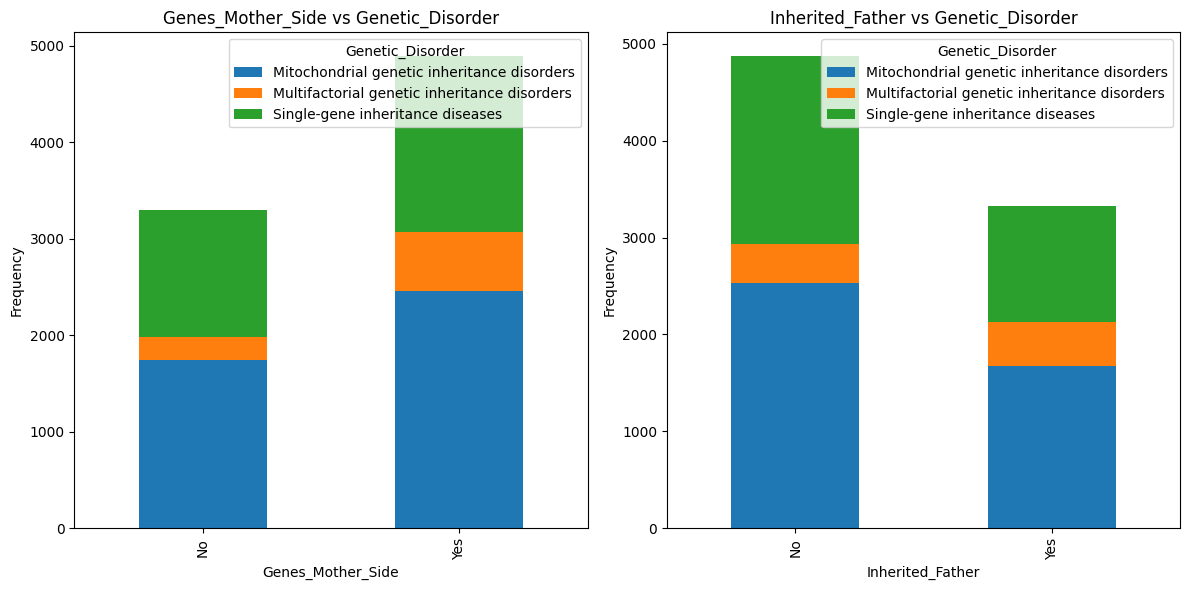

Chi-square test results:
Genes_Mother_Side vs Genetic_Disorder: p-value = 1.0636517694343766e-13
Inherited_Father vs Genetic_Disorder: p-value = 3.974252849898886e-13


"\nThe p-values obtained from the Chi-square tests indicate that there is strong evidence to reject the null hypothesis of independence between the variables.\n\n    For the association between 'Genes_Mother_Side' and 'Genetic_Disorder', the p-value is approximately 1.83×10−141.83×10−14, indicating a highly significant association.\n\n    Similarly, for the association between 'Inherited_Father' and 'Genetic_Disorder', the p-value is approximately 7.72×10−137.72×10−13, also indicating a highly significant association.\n\nThese results suggest that both the presence of certain genes inherited from the mother's side and the inheritance from the father significantly influence the risk of a genetic disorder in the child.\n"

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Stacked bar chart for 'Genes_Mother_Side'
contingency_table1.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Genes_Mother_Side vs Genetic_Disorder')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Genes_Mother_Side')
axes[0].legend(title='Genetic_Disorder')

# Stacked bar chart for 'Inherited_Father'
contingency_table2.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Inherited_Father vs Genetic_Disorder')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Inherited_Father')
axes[1].legend(title='Genetic_Disorder')

plt.tight_layout()
plt.show()

# Output the p-values
print("Chi-square test results:")
print("Genes_Mother_Side vs Genetic_Disorder: p-value =", p_1)
print("Inherited_Father vs Genetic_Disorder: p-value =", p_2)
"""
The p-values obtained from the Chi-square tests indicate that there is strong evidence to reject the null hypothesis of independence between the variables.

    For the association between 'Genes_Mother_Side' and 'Genetic_Disorder', the p-value is approximately 1.83×10−141.83×10−14, indicating a highly significant association.

    Similarly, for the association between 'Inherited_Father' and 'Genetic_Disorder', the p-value is approximately 7.72×10−137.72×10−13, also indicating a highly significant association.

These results suggest that both the presence of certain genes inherited from the mother's side and the inheritance from the father significantly influence the risk of a genetic disorder in the child.
"""

##4.2) dataset Describe

In [ ]:
dataset_encode_fill.describe()

Patient_Age  Genes_Mother_Side  Inherited_Father  Maternal_Gene  \
count  6900.000000        6900.000000       6900.000000    6900.000000   
mean      6.921884           0.597681          0.401594       0.560000   
std       4.348276           0.490401          0.490256       0.496423   
min       0.000000           0.000000          0.000000       0.000000   
25%       3.000000           0.000000          0.000000       0.000000   
50%       7.000000           1.000000          0.000000       1.000000   
75%      11.000000           1.000000          1.000000       1.000000   
max      14.000000           1.000000          1.000000       1.000000   

       Paternal_Gene  Blood_Cell_mcL   Mother_Age   Father_Age  \
count    6900.000000     6900.000000  6900.000000  6900.000000   
mean        0.431159        4.900978    34.662464    41.970435   
std         0.495274        0.199973     9.821784    12.960430   
min         0.000000        4.146230    18.000000    20.000000   
25%         0.000000        4.766416    26.000000    31.000000   
50%         0.000000        4.900331    35.000000    42.000000   
75%         1.000000        5.036486    43.000000    53.000000   
max         1.000000        5.609829    51.000000    64.000000   

       Respiratory_Rate_Breaths_Min  Heart_Rates_Min  ...  Substance_Abuse  \
count                   6900.000000      6900.000000  ...      6900.000000   
mean                       0.506667         0.488261  ...         0.252899   
std                        0.499992         0.499898  ...         0.434705   
min                        0.000000         0.000000  ...         0.000000   
25%                        0.000000         0.000000  ...         0.000000   
50%                        1.000000         0.000000  ...         0.000000   
75%                        1.000000         1.000000  ...         1.000000   
max                        1.000000         1.000000  ...         1.000000   

       Assisted_Conception  History_Previous_Pregnancies  Previous_Abortion  \
count          6900.000000                   6900.000000        6900.000000   
mean              0.506667                      0.508841           2.001884   
std               0.499992                      0.499958           1.408718   
min               0.000000                      0.000000           0.000000   
25%               0.000000                      0.000000           1.000000   
50%               1.000000                      1.000000           2.000000   
75%               1.000000                      1.000000           3.000000   
max               1.000000                      1.000000           4.000000   

       Birth_Defects  White_Blood_Cell  Blood_Test_Result  Genetic_Disorder  \
count    6900.000000       6900.000000        6900.000000       6900.000000   
mean        0.499130          7.429167           1.510725          0.873043   
std         0.500035          2.650730           1.115728          0.937130   
min         0.000000          3.000000           0.000000          0.000000   
25%         0.000000          5.372656           1.000000          0.000000   
50%         0.000000          7.378162           2.000000          0.000000   
75%         1.000000          9.441975           3.000000          2.000000   
max         1.000000         12.000000           3.000000          2.000000   

       Disorder_Subclass  Total_symptom  
count        6900.000000    6900.000000  
mean            5.295797       0.529043  
std             2.152246       0.227511  
min             0.000000       0.000000  
25%             3.000000       0.400000  
50%             6.000000       0.600000  
75%             7.000000       0.600000  
max             8.000000       1.000000  

[8 rows x 25 columns]

In [ ]:
dataset_encode_drop.describe()

Patient_Age  Genes_Mother_Side  Inherited_Father  Maternal_Gene  \
count  6900.000000        6900.000000       6900.000000    6900.000000   
mean      6.921884           0.597681          0.401594       0.560000   
std       4.348276           0.490401          0.490256       0.496423   
min       0.000000           0.000000          0.000000       0.000000   
25%       3.000000           0.000000          0.000000       0.000000   
50%       7.000000           1.000000          0.000000       1.000000   
75%      11.000000           1.000000          1.000000       1.000000   
max      14.000000           1.000000          1.000000       1.000000   

       Paternal_Gene  Blood_Cell_mcL   Mother_Age   Father_Age  \
count    6900.000000     6900.000000  6900.000000  6900.000000   
mean        0.431159        4.900978    34.662464    41.970435   
std         0.495274        0.199973     9.821784    12.960430   
min         0.000000        4.146230    18.000000    20.000000   
25%         0.000000        4.766416    26.000000    31.000000   
50%         0.000000        4.900331    35.000000    42.000000   
75%         1.000000        5.036486    43.000000    53.000000   
max         1.000000        5.609829    51.000000    64.000000   

       Respiratory_Rate_Breaths_Min  Heart_Rates_Min  ...  Substance_Abuse  \
count                   6900.000000      6900.000000  ...      6900.000000   
mean                       0.506667         0.488261  ...         0.252899   
std                        0.499992         0.499898  ...         0.434705   
min                        0.000000         0.000000  ...         0.000000   
25%                        0.000000         0.000000  ...         0.000000   
50%                        1.000000         0.000000  ...         0.000000   
75%                        1.000000         1.000000  ...         1.000000   
max                        1.000000         1.000000  ...         1.000000   

       Assisted_Conception  History_Previous_Pregnancies  Previous_Abortion  \
count          6900.000000                   6900.000000        6900.000000   
mean              0.506667                      0.508841           2.001884   
std               0.499992                      0.499958           1.408718   
min               0.000000                      0.000000           0.000000   
25%               0.000000                      0.000000           1.000000   
50%               1.000000                      1.000000           2.000000   
75%               1.000000                      1.000000           3.000000   
max               1.000000                      1.000000           4.000000   

       Birth_Defects  White_Blood_Cell  Blood_Test_Result  Genetic_Disorder  \
count    6900.000000       6900.000000        6900.000000       6900.000000   
mean        0.499130          7.429167           1.510725          1.277826   
std         0.500035          2.650730           1.115728          0.642100   
min         0.000000          3.000000           0.000000          0.000000   
25%         0.000000          5.372656           1.000000          1.000000   
50%         0.000000          7.378162           2.000000          1.000000   
75%         1.000000          9.441975           3.000000          2.000000   
max         1.000000         12.000000           3.000000          2.000000   

       Disorder_Subclass  Total_symptom  
count        6900.000000    6900.000000  
mean            3.744058       0.529043  
std             2.492488       0.227511  
min             0.000000       0.000000  
25%             2.000000       0.400000  
50%             3.000000       0.600000  
75%             6.000000       0.600000  
max             8.000000       1.000000  

[8 rows x 25 columns]

##4.3) heatmap

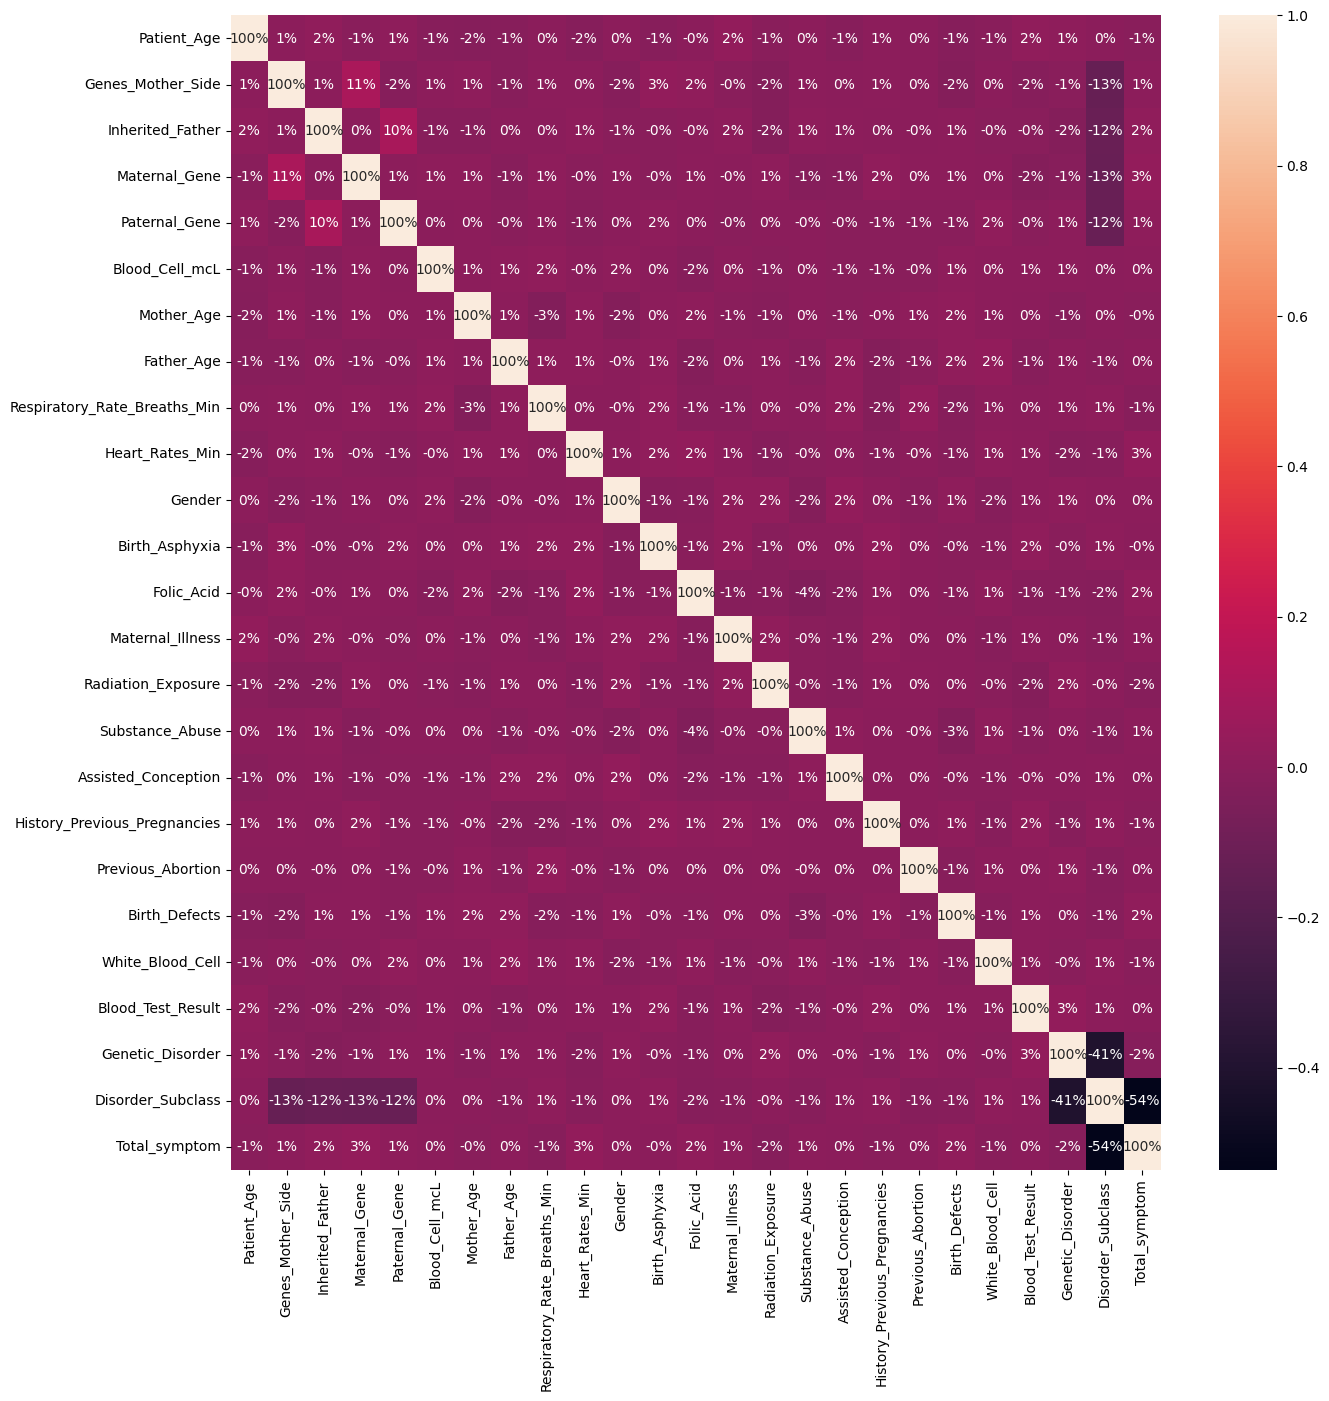

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset_encode_fill.iloc[:,0:39].corr(),annot=True,fmt=".0%")
plt.show()

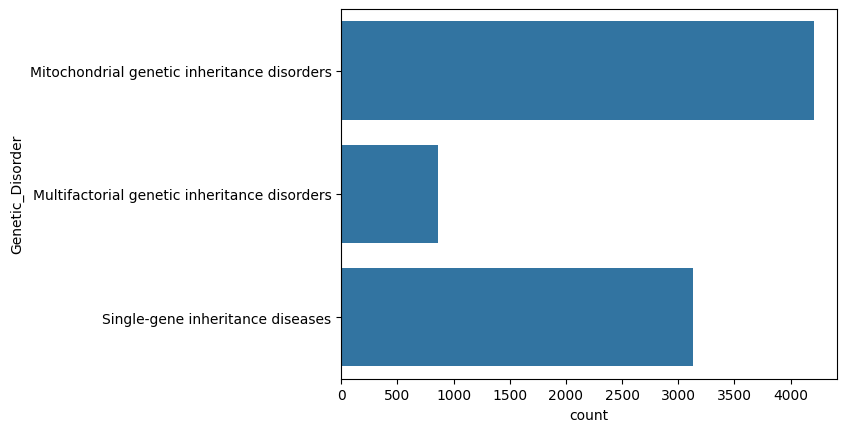

In [ ]:
sns.countplot(dataset_fill.Genetic_Disorder,label="count")
plt.show()

In [ ]:
dataset_encode_fill.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene',
       'Paternal_Gene', 'Blood_Cell_mcL', 'Mother_Age', 'Father_Age',
       'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min', 'Gender',
       'Birth_Asphyxia', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_Test_Result', 'Genetic_Disorder',
       'Disorder_Subclass', 'Total_symptom'],
      dtype='object')

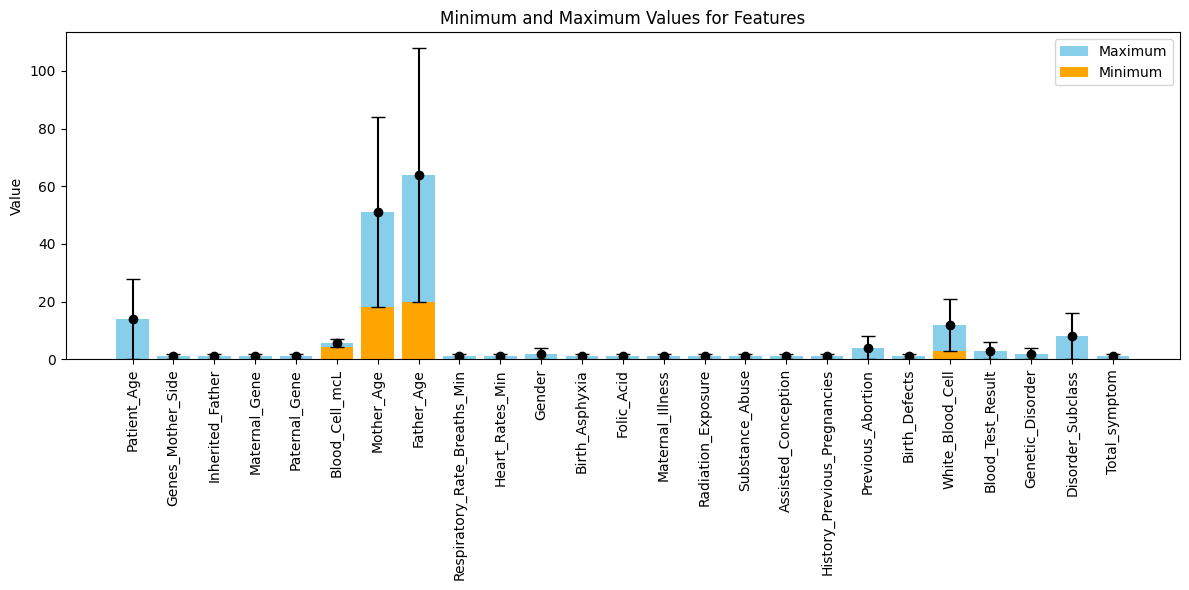

In [ ]:
min_values = dataset_encode_fill.min()
max_values = dataset_encode_fill.max()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(min_values.index, max_values, color='skyblue', label='Maximum')
plt.bar(min_values.index, min_values, color='orange', label='Minimum')
plt.errorbar(min_values.index, max_values, yerr=max_values - min_values, fmt='o', color='black', capsize=5)
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('Minimum and Maximum Values for Features')
plt.legend()
plt.tight_layout()
plt.show()

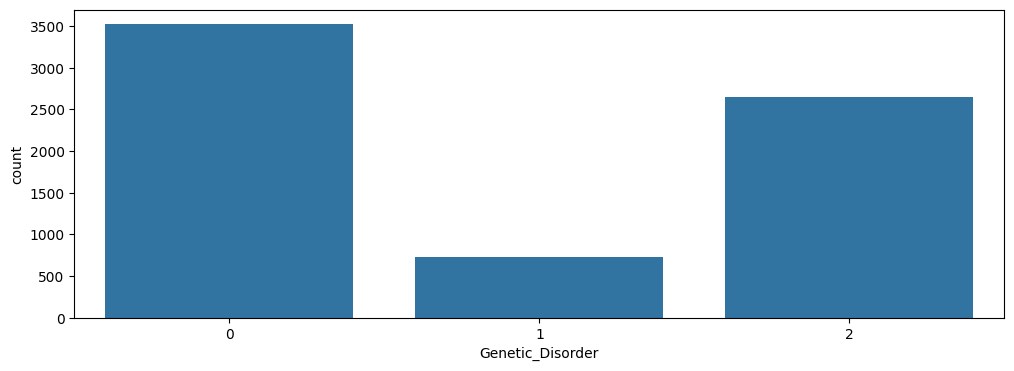

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'Genetic_Disorder', data = dataset_encode_fill);

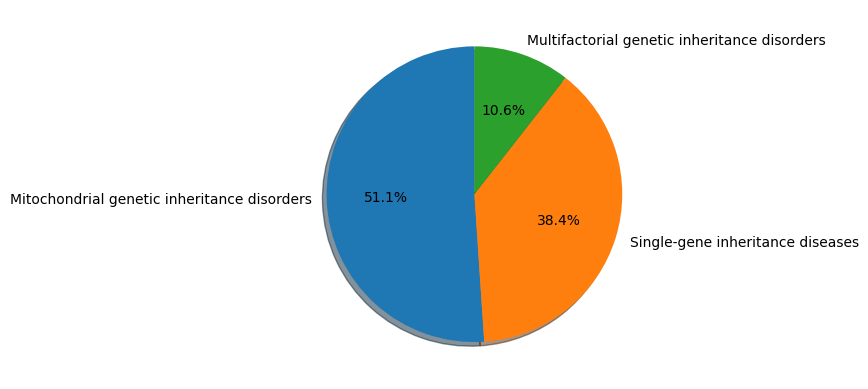

In [ ]:
labels1 = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode1 = (0, 0, 0)
plt.pie(dataset_encode_fill.Genetic_Disorder.value_counts(), explode=explode1, labels=labels1, autopct='%1.1f%%',shadow=True, startangle=90);

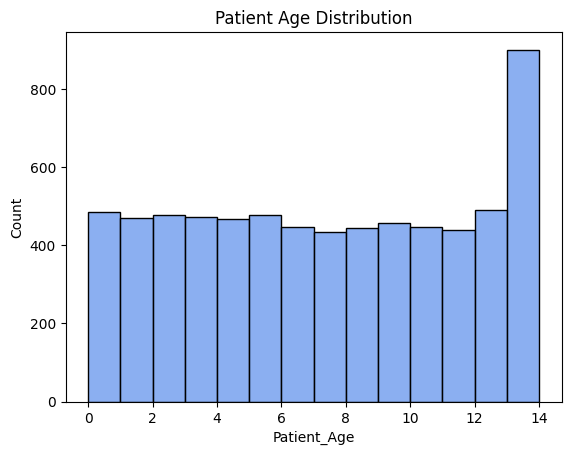

In [ ]:
sns.histplot(data = dataset_encode_fill, x = 'Patient_Age', bins = 14, color = 'cornflowerblue')
plt.title('Patient Age Distribution')
plt.show()

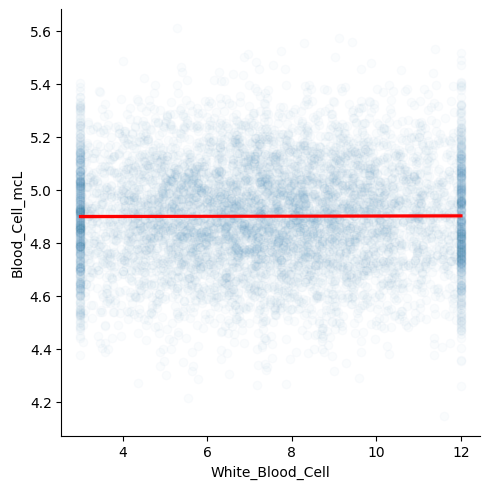

In [ ]:
sns.lmplot(data = dataset_encode_fill, x = 'White_Blood_Cell', y = 'Blood_Cell_mcL', scatter_kws = {'alpha' : 0.02}, line_kws = {'color':'red'})
plt.show()

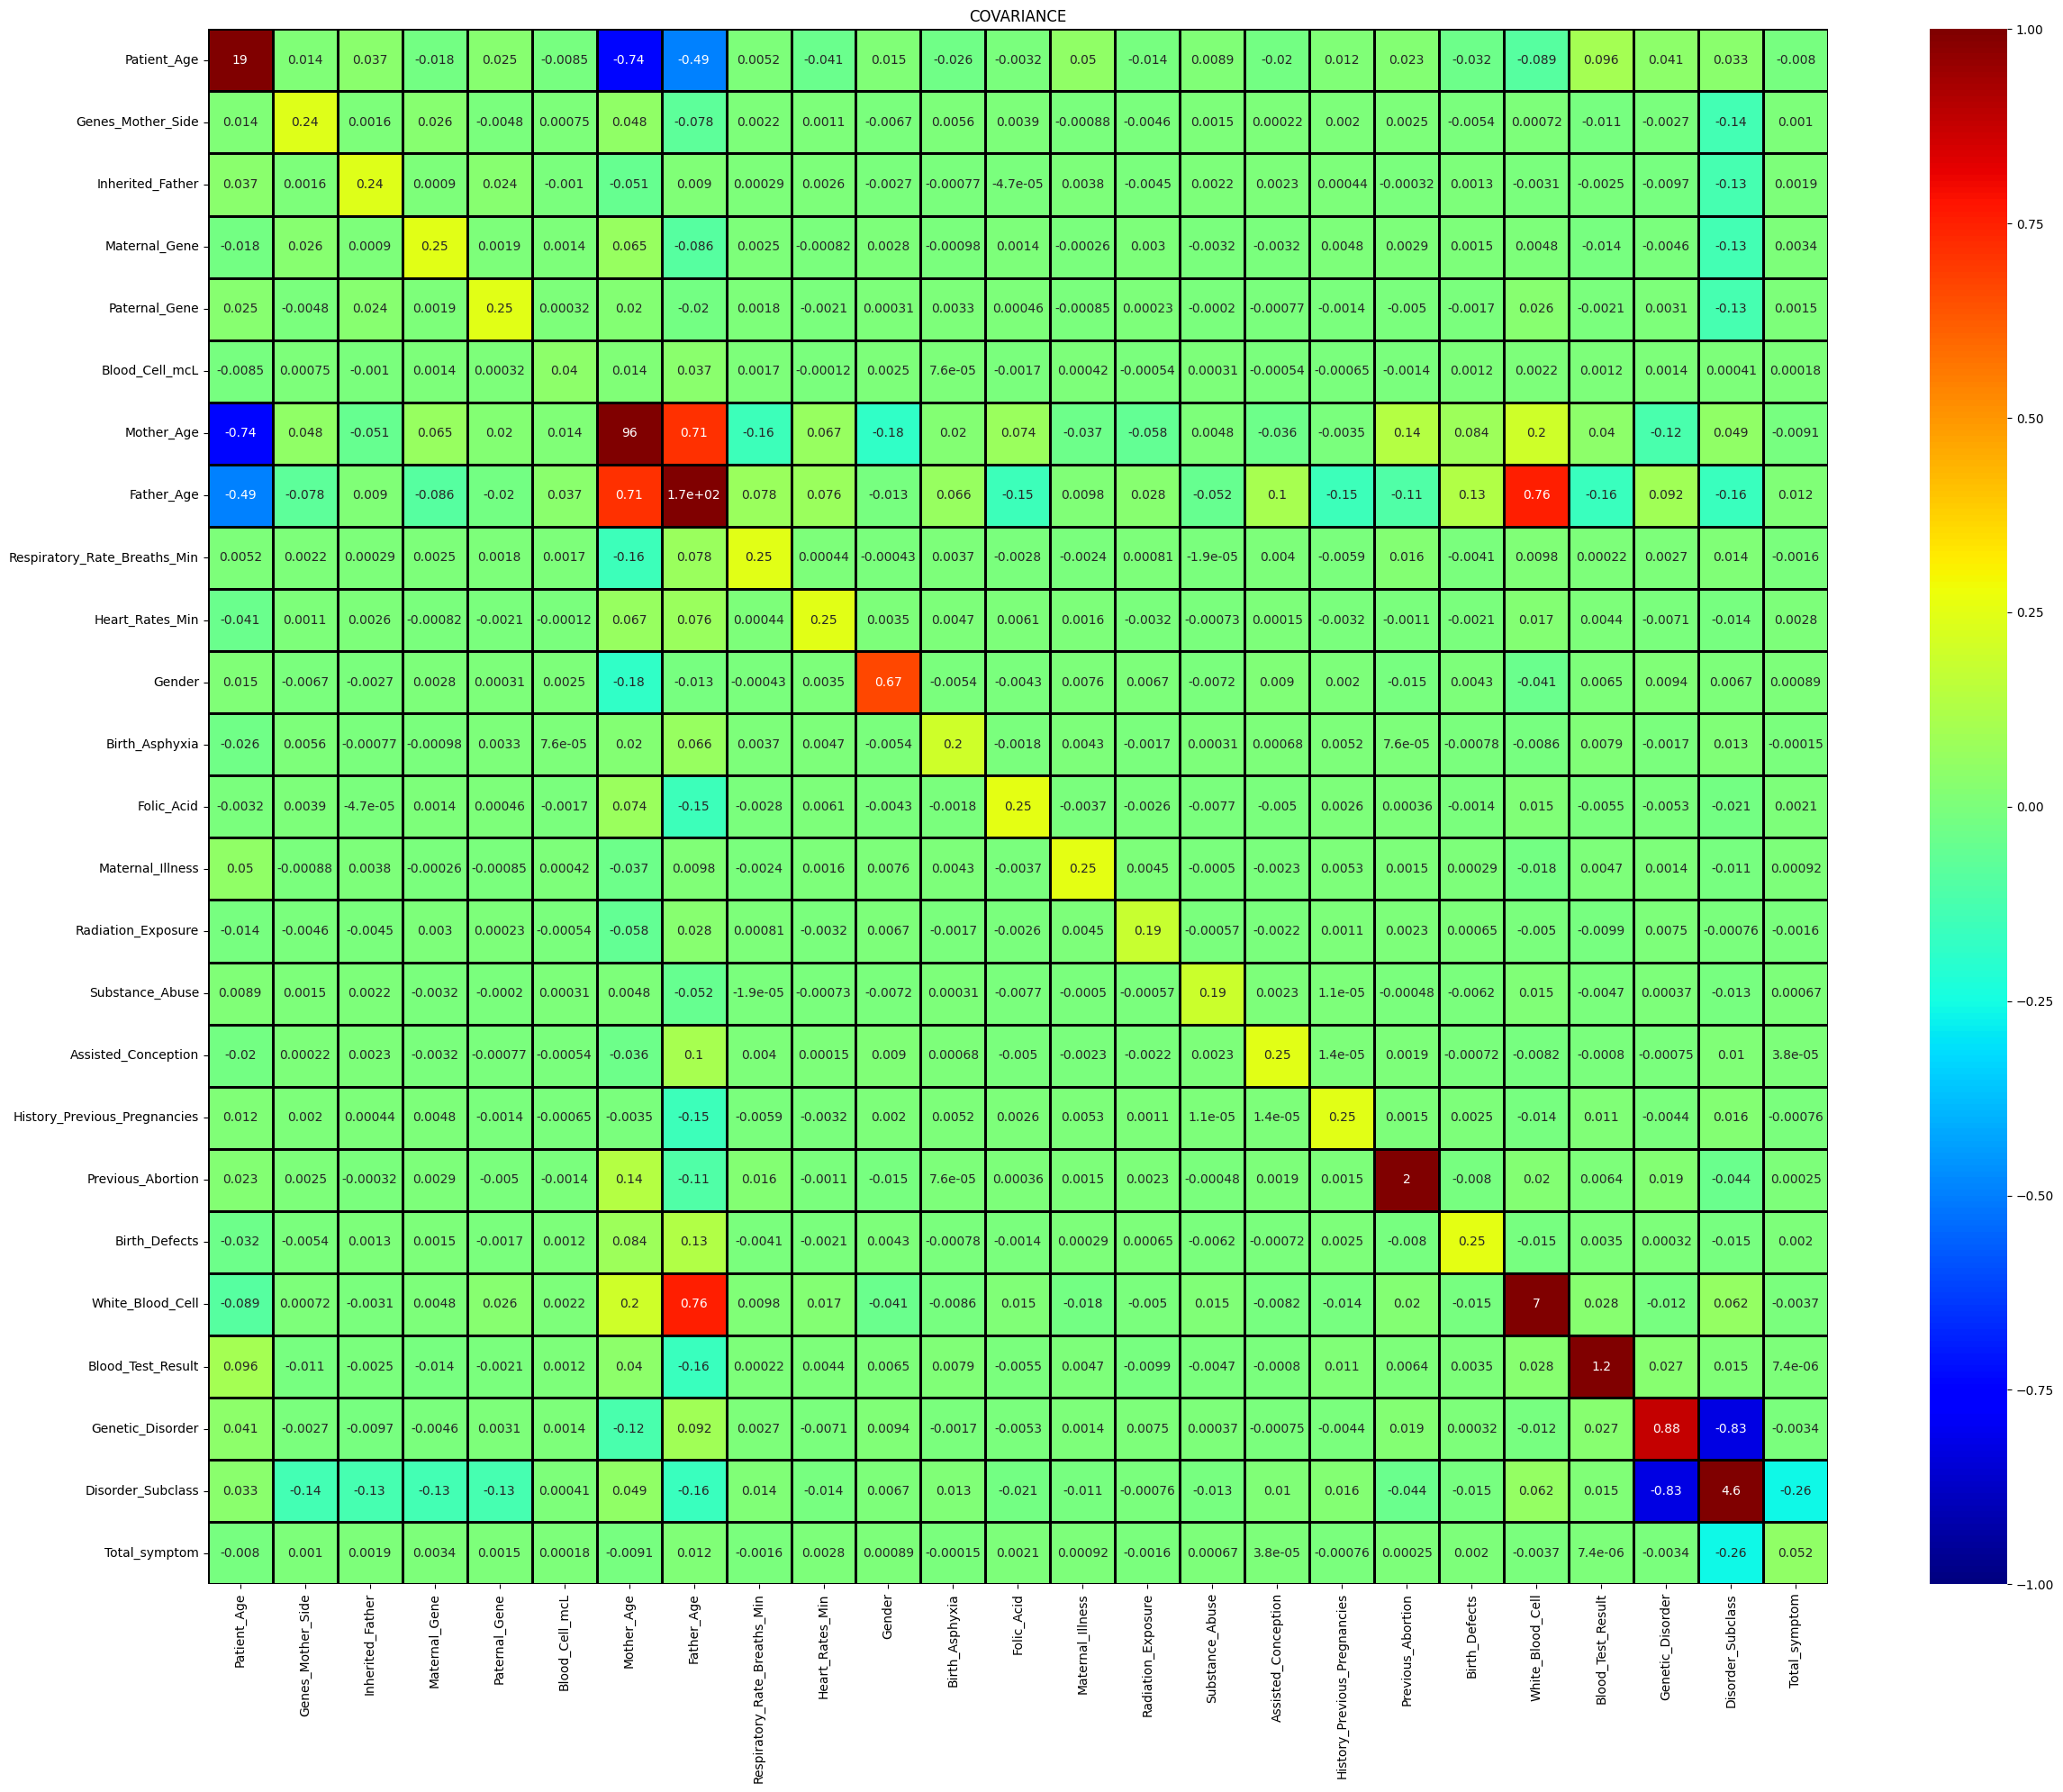

In [ ]:
Cov_Result = dataset_encode_fill.cov()
figure = plt.figure(figsize=(25,20))
sns.heatmap(Cov_Result,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="black",cmap="jet")
plt.title("COVARIANCE")
plt.tight_layout()
plt.show()

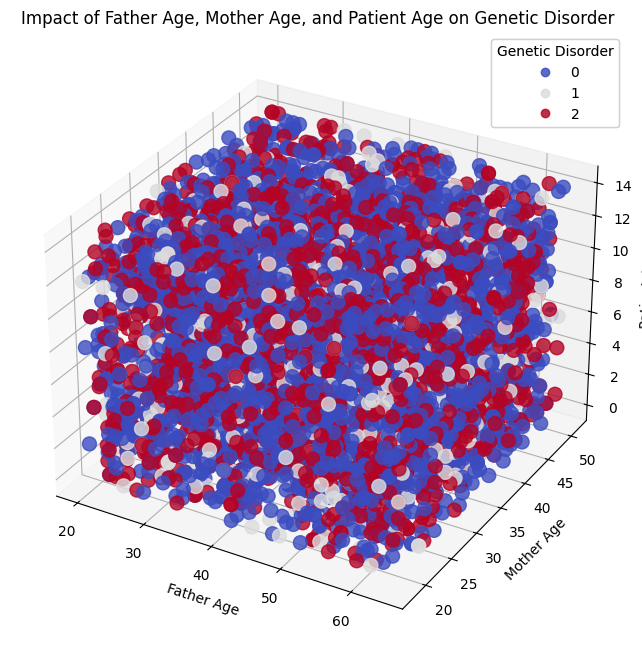

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
father_age = dataset_encode_fill['Father_Age']
mother_age = dataset_encode_fill['Mother_Age']
patient_age = dataset_encode_fill['Patient_Age']
genetic_disorder = dataset_encode_fill['Genetic_Disorder']

# Scatter plot
scatter = ax.scatter(father_age, mother_age, patient_age, c=genetic_disorder, cmap='coolwarm', s=100, alpha=0.8)

# Set labels and title
ax.set_xlabel('Father Age')
ax.set_ylabel('Mother Age')
ax.set_zlabel('Patient Age')
ax.set_title('Impact of Father Age, Mother Age, and Patient Age on Genetic Disorder')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title='Genetic Disorder')
ax.add_artist(legend1)

plt.show()

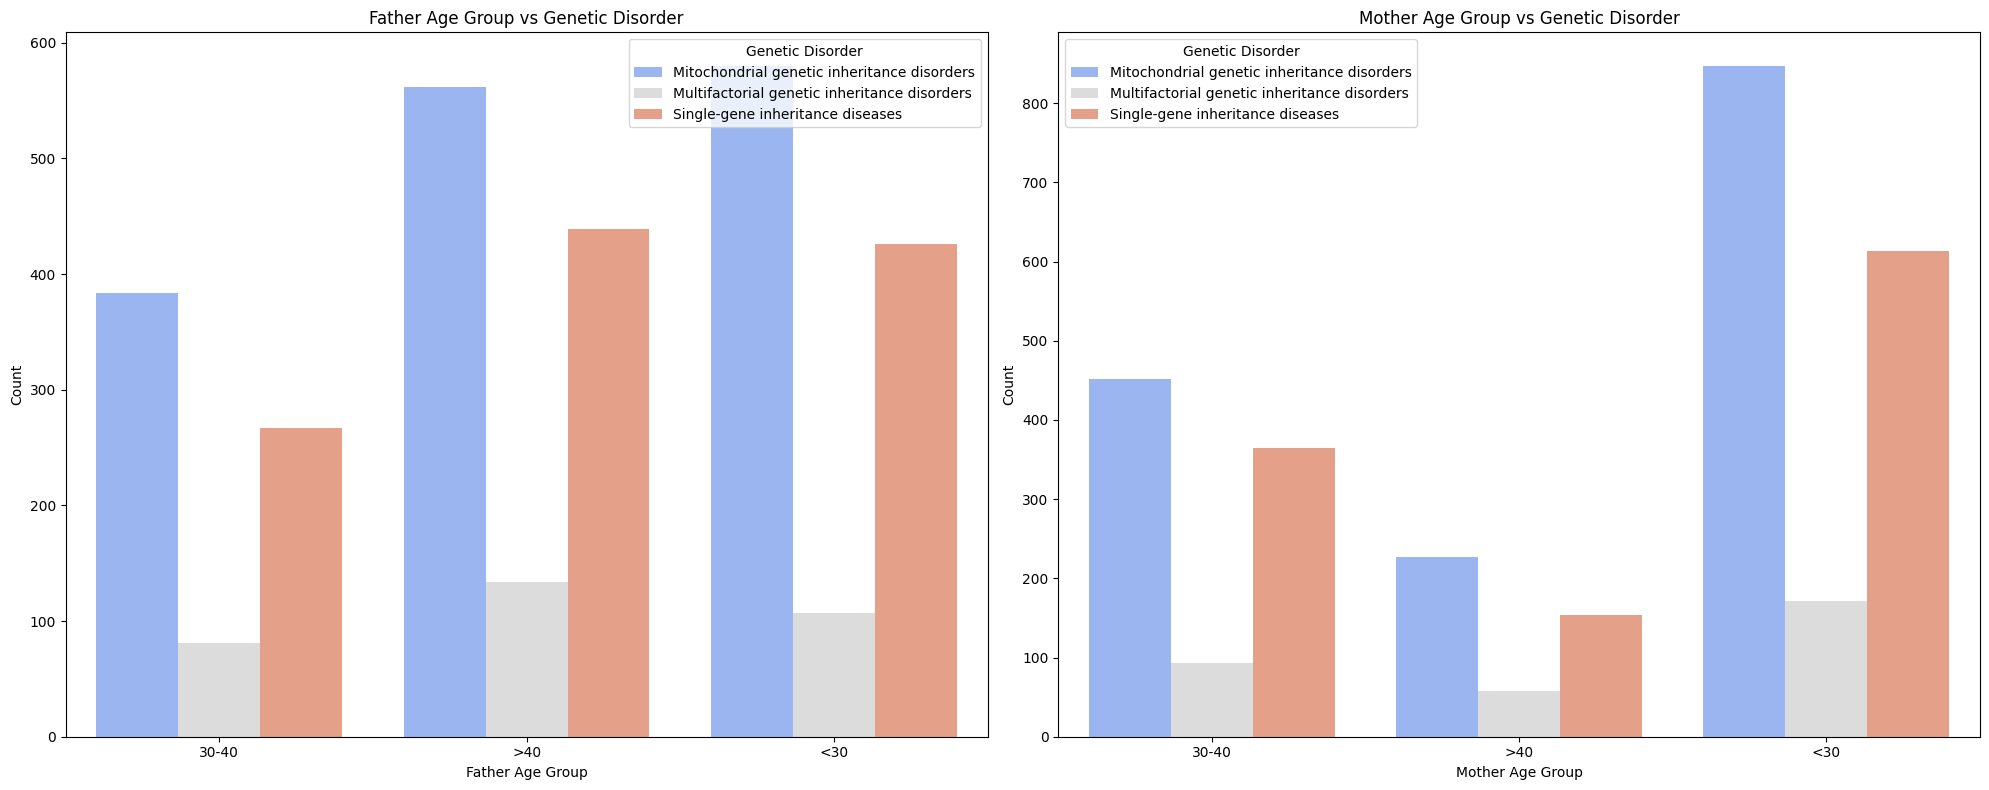

In [ ]:
# Calculate age at which parents gave birth
father_age_at_birth = dataset_fill['Father_Age'] - dataset_fill['Patient_Age']
mother_age_at_birth = dataset_fill['Mother_Age'] - dataset_fill['Patient_Age']

# Define age groups for both mother and father
age_groups = {
    'Father_Age_Group': [],
    'Mother_Age_Group': []
}

for age in father_age_at_birth:
    if age < 30:
        age_groups['Father_Age_Group'].append('<30')
    elif 30 <= age < 40:
        age_groups['Father_Age_Group'].append('30-40')
    else:
        age_groups['Father_Age_Group'].append('>40')

for age in mother_age_at_birth:
    if age < 30:
        age_groups['Mother_Age_Group'].append('<30')
    elif 30 <= age < 40:
        age_groups['Mother_Age_Group'].append('30-40')
    else:
        age_groups['Mother_Age_Group'].append('>40')

# Associate age groups with genetic disorder
age_groups_df = pd.DataFrame(age_groups)
dataset_age_grouped = pd.concat([age_groups_df, dataset_fill['Genetic_Disorder']], axis=1)

# Plot association
plt.figure(figsize=(20, 8))

# Plot for Father Age Group vs Genetic Disorder
plt.subplot(1, 2, 1)
sns.countplot(x='Father_Age_Group', hue='Genetic_Disorder', data=dataset_age_grouped, palette='coolwarm')
plt.title('Father Age Group vs Genetic Disorder')
plt.xlabel('Father Age Group')
plt.ylabel('Count')
plt.legend(title='Genetic Disorder')

# Plot for Mother Age Group vs Genetic Disorder
plt.subplot(1, 2, 2)
sns.countplot(x='Mother_Age_Group', hue='Genetic_Disorder', data=dataset_age_grouped, palette='coolwarm')
plt.title('Mother Age Group vs Genetic Disorder')
plt.xlabel('Mother Age Group')
plt.ylabel('Count')
plt.legend(title='Genetic Disorder')

plt.tight_layout()
plt.show()


In [ ]:
dataset_fill_name = dataset_fill.copy()
dataset_fill_name["Genetic_Disorder"]=["Mitochondrial" if i.strip()== "Mitochondrial genetic inheritance disorders" else "Multifactorial" if i.strip() == "Multifactorial genetic inheritance disorders" else "Single" for i in dataset_fill_name["Genetic_Disorder"]]

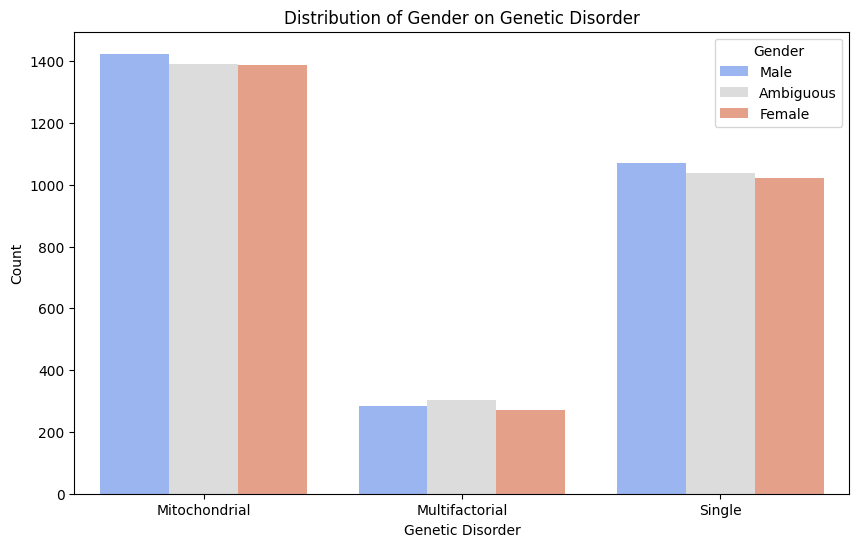

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Genetic_Disorder', hue='Gender', data=dataset_fill_name, palette='coolwarm')
total = len(dataset_fill_name)
plt.title('Distribution of Gender on Genetic Disorder')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

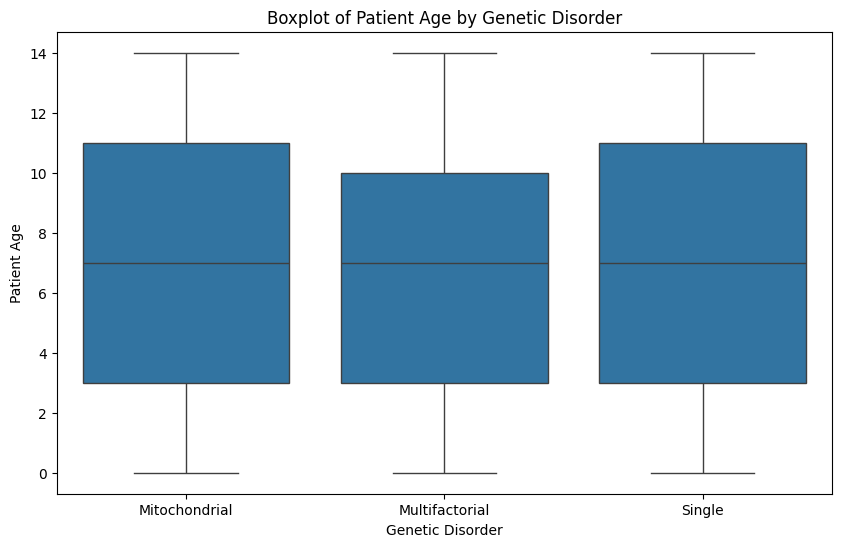

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genetic_Disorder', y='Patient_Age', data=dataset_fill_name)
plt.title('Boxplot of Patient Age by Genetic Disorder')
plt.xlabel('Genetic Disorder')
plt.ylabel('Patient Age')
plt.show()

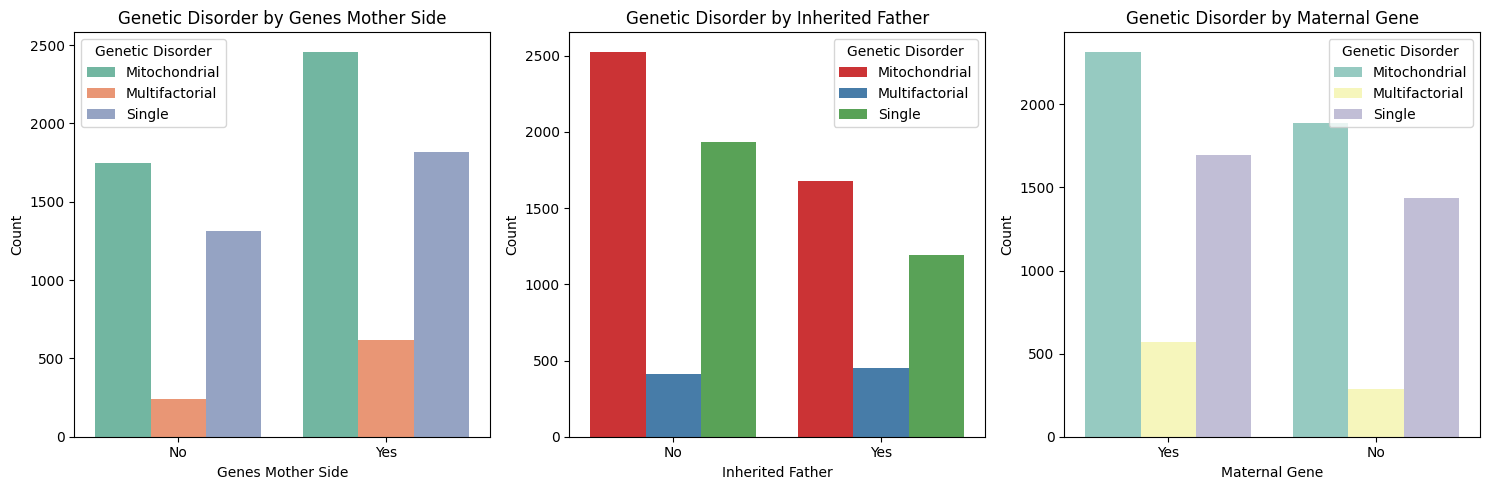

In [ ]:
plt.figure(figsize=(15, 5))

# Define custom color palettes for each subplot
palettes = ['Set2', 'Set1', 'Set3']

# Iterate through the subplots and plot data
for i, column in enumerate(['Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene']):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=column, hue='Genetic_Disorder', data=dataset_fill_name, palette=palettes[i])
    plt.title(f'Genetic Disorder by {column.replace("_", " ")}')
    plt.xlabel(column.replace("_", " "))
    plt.ylabel('Count')
    plt.legend(title='Genetic Disorder')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


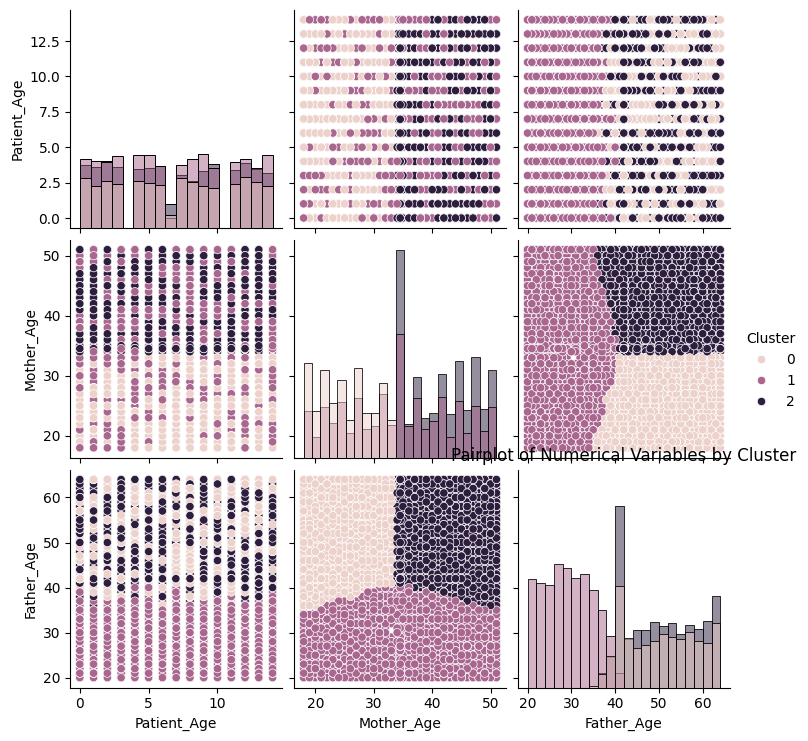

In [ ]:
from sklearn.cluster import KMeans

# Create a copy of the dataset to work with
dataset_copy2 = dataset_fill_name.copy()

# Select numerical features for clustering
numerical_features = dataset_copy2[['Patient_Age', 'Mother_Age', 'Father_Age']]

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(numerical_features)

# Add cluster labels to the copied dataset
dataset_copy2['Cluster'] = kmeans.labels_

# Plot clustered data
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataset_copy2, hue='Cluster', diag_kind='hist', vars=numerical_features.columns)
plt.title('Pairplot of Numerical Variables by Cluster')
plt.show()


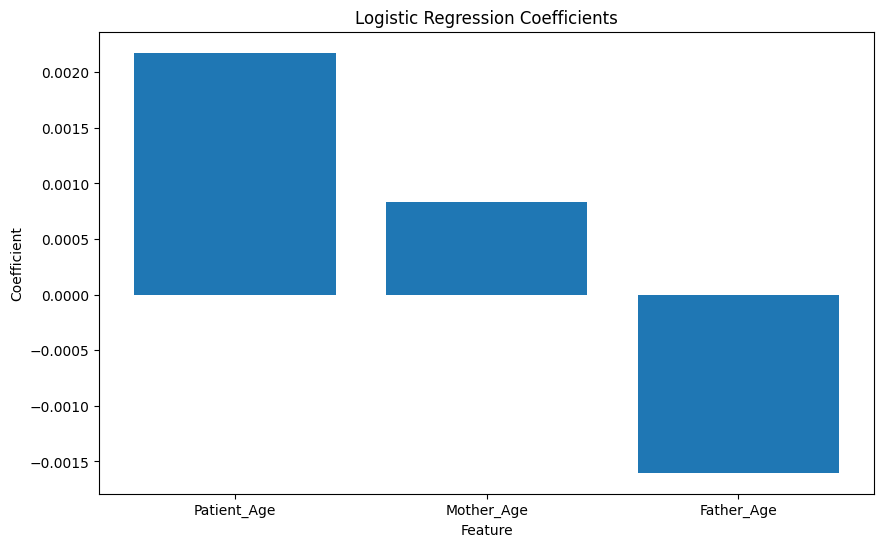

In [ ]:
from sklearn.linear_model import LogisticRegression

# Select features and target variable
X = dataset_fill_name[['Patient_Age', 'Mother_Age', 'Father_Age']]
y = dataset_fill_name['Genetic_Disorder']

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, logreg.coef_[0])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

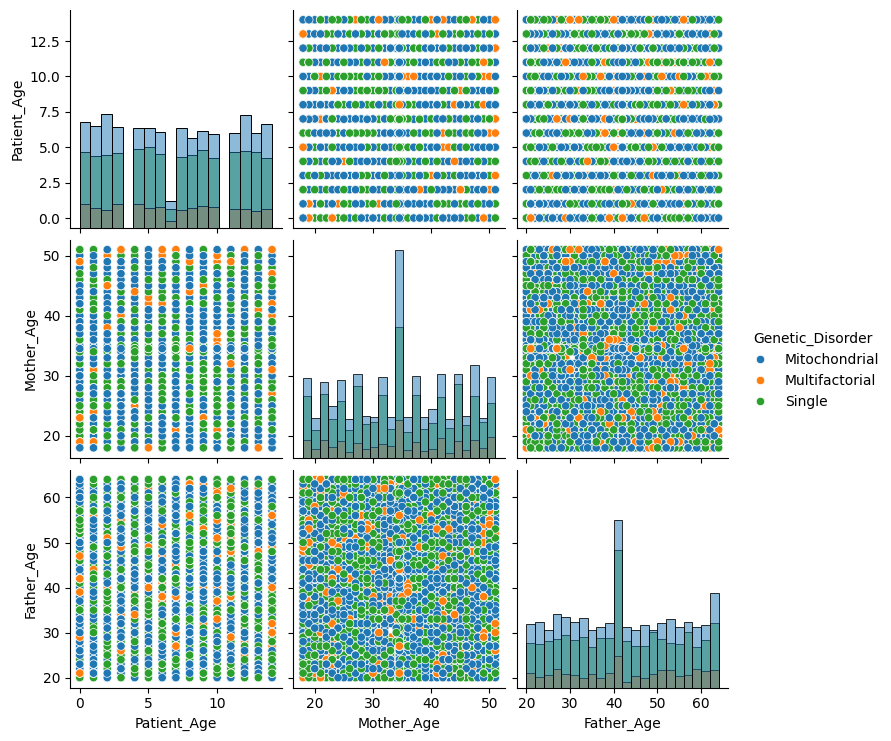

In [ ]:
sns.pairplot(dataset_fill_name, hue='Genetic_Disorder', diag_kind='hist', vars=['Patient_Age', 'Mother_Age', 'Father_Age'])
plt.show()

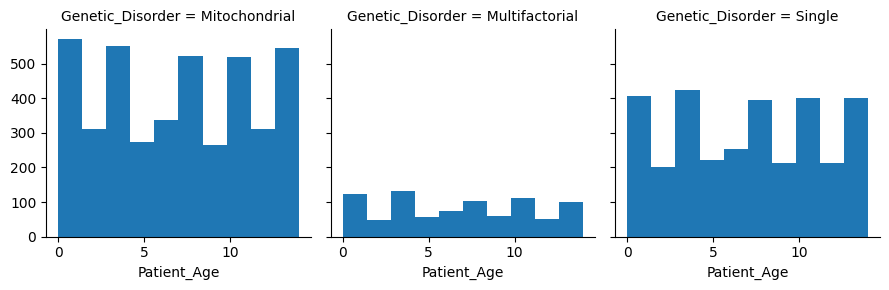

In [ ]:
g = sns.FacetGrid(dataset_fill_name, col='Genetic_Disorder')
g.map(plt.hist, 'Patient_Age')
plt.show()

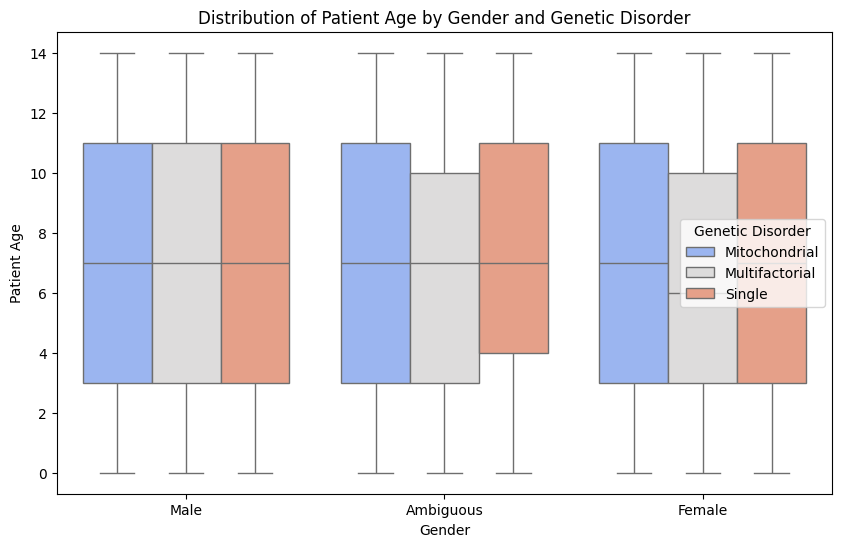

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_fill_name, x='Gender', y='Patient_Age', hue='Genetic_Disorder', palette='coolwarm')
plt.title('Distribution of Patient Age by Gender and Genetic Disorder')
plt.xlabel('Gender')
plt.ylabel('Patient Age')
plt.legend(title='Genetic Disorder')
plt.show()

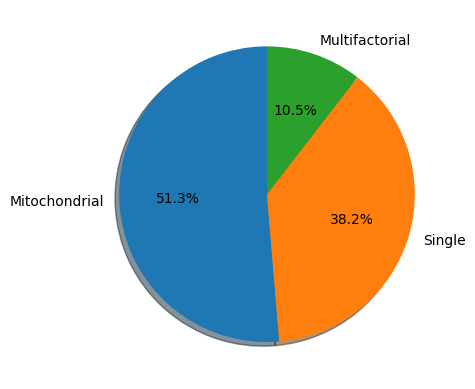

In [ ]:
labels33 = 'Mitochondrial', 'Single', 'Multifactorial'
explode33 = (0, 0, 0)
plt.pie(dataset_fill_name.Genetic_Disorder.value_counts(), explode=explode33, labels=labels33, autopct='%1.1f%%',shadow=True, startangle=90);

# 5) Auto-ML

In [ ]:
!pip install lazypredict

##5.1) Genetic Disorder

In [ ]:
X = dataset_encode_fill.drop(columns=['Genetic_Disorder'])  # Features
y = dataset_encode_fill['Genetic_Disorder']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 30/31 [00:24<00:01,  1.58s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 5175, number of used features: 24
[LightGBM] [Info] Start training from score -0.666642
[LightGBM] [Info] Start training from score -2.248976
[LightGBM] [Info] Start training from score -0.964791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

100%|██████████| 31/31 [00:25<00:00,  1.23it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
models

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
ExtraTreesClassifier               0.98               0.96    None      0.98   
RandomForestClassifier             0.99               0.96    None      0.99   
AdaBoostClassifier                 0.83               0.86    None      0.84   
QuadraticDiscriminantAnalysis      0.87               0.80    None      0.88   
GaussianNB                         0.81               0.80    None      0.83   
SVC                                0.81               0.69    None      0.80   
NearestCentroid                    0.63               0.67    None      0.59   
LinearDiscriminantAnalysis         0.73               0.65    None      0.71   
LogisticRegression                 0.72               0.63    None      0.70   
ExtraTreeClassifier                0.67               0.62    None      0.67   
BernoulliNB                        0.69               0.62    None      0.67   
CalibratedClassifierCV             0.74               0.62    None      0.72   
LinearSVC                          0.73               0.59    None      0.71   
SGDClassifier                      0.73               0.58    None      0.71   
Perceptron                         0.60               0.58    None      0.60   
RidgeClassifierCV                  0.73               0.53    None      0.68   
RidgeClassifier                    0.73               0.53    None      0.68   
KNeighborsClassifier               0.62               0.52    None      0.60   
LabelSpreading                     0.57               0.49    None      0.56   
LabelPropagation                   0.57               0.49    None      0.56   
PassiveAggressiveClassifier        0.59               0.49    None      0.58   
DummyClassifier                    0.50               0.33    None      0.34   

                               Time Taken  
Model                                      
LGBMClassifier                       1.15  
XGBClassifier                        5.06  
DecisionTreeClassifier               0.04  
BaggingClassifier                    0.19  
ExtraTreesClassifier                 1.30  
RandomForestClassifier               2.87  
AdaBoostClassifier                   1.05  
QuadraticDiscriminantAnalysis        0.14  
GaussianNB                           0.04  
SVC                                  3.33  
NearestCentroid                      0.08  
LinearDiscriminantAnalysis           0.30  
LogisticRegression                   0.24  
ExtraTreeClassifier                  0.10  
BernoulliNB                          0.07  
CalibratedClassifierCV               0.45  
LinearSVC                            0.15  
SGDClassifier                        0.74  
Perceptron                           0.12  
RidgeClassifierCV                    0.17  
RidgeClassifier                      0.14  
KNeighborsClassifier                 0.34  
LabelSpreading                       3.65  
LabelPropagation                     3.03  
PassiveAggressiveClassifier          0.16  
DummyClassifier                      0.03

In [ ]:
import plotly.express as px
#models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,title = {'text': 'Accuracy vs Model (Genetic Disorder with Disorder Subclass)'})
line.show()

In [ ]:
#models.sort_values(by = 'Time Taken',inplace = True,ascending = False)
models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "Time Taken")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,title = {'text': 'Time Taken Vs Model (Genetic Disorder with Disorder Subclass)'})
line.show()

In [ ]:
#models.sort_values(by = 'F1 Score',inplace = True,ascending = False)
models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["F1 Score"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "F1 Score")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,title = {'text': 'F1 Score Vs Model (Genetic Disorder with Disorder Subclass)'})
line.show()

## 5.2) Disorder subclass

In [ ]:
X_sub = dataset_encode_fill.drop(columns=['Disorder_Subclass'])  # Features
y_sub = dataset_encode_fill['Disorder_Subclass']  # Target variable
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.25, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler_sub = StandardScaler()
X_train_sub = scaler_sub.fit_transform(X_train_sub)
X_test_sub = scaler_sub.transform(X_test_sub)
from lazypredict.Supervised import LazyClassifier
clf_sub = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_sub,predictions_sub = clf_sub.fit(X_train_sub, X_test_sub, y_train_sub, y_test_sub)
models_sub

 97%|█████████▋| 30/31 [00:38<00:03,  3.26s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 5175, number of used features: 24
[LightGBM] [Info] Start training from score -4.813925
[LightGBM] [Info] Start training from score -5.607156
[LightGBM] [Info] Start training from score -1.734859
[LightGBM] [Info] Start training from score -2.367446
[LightGBM] [Info] Start training from score -2.728549
[LightGBM] [Info] Start training from score -3.369811
[LightGBM] [Info] Start training from score -1.347445
[LightGBM] [Info] Start training from score -1.518088
[LightGBM] [Info] Start training from score -1.970955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

100%|██████████| 31/31 [00:40<00:00,  1.31s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
BaggingClassifier                  0.69               0.72    None      0.69   
LGBMClassifier                     0.73               0.71    None      0.72   
LogisticRegression                 0.76               0.71    None      0.76   
XGBClassifier                      0.71               0.71    None      0.71   
NearestCentroid                    0.66               0.69    None      0.67   
GaussianNB                         0.75               0.69    None      0.74   
DecisionTreeClassifier             0.67               0.68    None      0.67   
LinearSVC                          0.74               0.65    None      0.72   
ExtraTreesClassifier               0.71               0.62    None      0.69   
SGDClassifier                      0.71               0.62    None      0.69   
RandomForestClassifier             0.71               0.60    None      0.69   
QuadraticDiscriminantAnalysis      0.68               0.59    None      0.67   
CalibratedClassifierCV             0.74               0.58    None      0.71   
SVC                                0.73               0.56    None      0.72   
PassiveAggressiveClassifier        0.65               0.55    None      0.64   
Perceptron                         0.64               0.54    None      0.64   
ExtraTreeClassifier                0.50               0.45    None      0.50   
BernoulliNB                        0.60               0.35    None      0.54   
RidgeClassifierCV                  0.60               0.35    None      0.52   
RidgeClassifier                    0.60               0.35    None      0.52   
LinearDiscriminantAnalysis         0.19               0.33    None      0.11   
AdaBoostClassifier                 0.49               0.33    None      0.33   
KNeighborsClassifier               0.48               0.32    None      0.46   
LabelPropagation                   0.43               0.30    None      0.43   
LabelSpreading                     0.43               0.30    None      0.43   
DummyClassifier                    0.23               0.11    None      0.09   

                               Time Taken  
Model                                      
BaggingClassifier                    0.69  
LGBMClassifier                       2.27  
LogisticRegression                   1.01  
XGBClassifier                       14.90  
NearestCentroid                      0.14  
GaussianNB                           0.04  
DecisionTreeClassifier               0.15  
LinearSVC                            0.56  
ExtraTreesClassifier                 2.04  
SGDClassifier                        0.40  
RandomForestClassifier               1.93  
QuadraticDiscriminantAnalysis        0.14  
CalibratedClassifierCV               0.88  
SVC                                  4.22  
PassiveAggressiveClassifier          0.37  
Perceptron                           0.22  
ExtraTreeClassifier                  0.05  
BernoulliNB                          0.04  
RidgeClassifierCV                    0.09  
RidgeClassifier                      0.06  
LinearDiscriminantAnalysis           0.32  
AdaBoostClassifier                   1.25  
KNeighborsClassifier                 0.26  
LabelPropagation                     3.19  
LabelSpreading                       5.09  
DummyClassifier                      0.05

In [ ]:
import plotly.express as px
models_sub.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models_sub ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,title = {'text': 'Accuracy vs Model'})
line.show()

In [ ]:
#models.sort_values(by = 'Time Taken',inplace = True,ascending = False)
models_sub.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models_sub ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "Time Taken")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,title = {'text': 'Time Taken Vs Model'})
line.show()

In [ ]:
#models.sort_values(by = 'F1 Score',inplace = True,ascending = False)
models_sub.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models_sub ,y =["F1 Score"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "F1 Score")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,title = {'text': 'F1 Score Vs Model'})
line.show()

##5.3) Genetic Disorder without Disorder *Subclass*

In [ ]:
X_gen_only = dataset_encode_fill.drop(columns=['Disorder_Subclass','Genetic_Disorder'])  # Features
y_gen_only = dataset_encode_fill['Genetic_Disorder']  # Target variable
X_train_gen_only, X_test_gen_only, y_train_gen_only, y_test_gen_only = train_test_split(X_gen_only, y_gen_only, test_size=0.25, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler_gen_only = StandardScaler()
X_train_gen_only = scaler_gen_only.fit_transform(X_train_gen_only)
X_test_gen_only = scaler_gen_only.transform(X_test_gen_only)
from lazypredict.Supervised import LazyClassifier
clf_gen_only = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_gen_only,predictions_gen_only = clf_gen_only.fit(X_train_gen_only, X_test_gen_only, y_train_gen_only, y_test_gen_only)
models_gen_only

 97%|█████████▋| 30/31 [00:13<00:00,  2.33it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 5175, number of used features: 23
[LightGBM] [Info] Start training from score -0.666642
[LightGBM] [Info] Start training from score -2.248976
[LightGBM] [Info] Start training from score -0.964791


100%|██████████| 31/31 [00:13<00:00,  2.29it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.47               0.57    None      0.48   
AdaBoostClassifier                 0.60               0.54    None      0.59   
LGBMClassifier                     0.59               0.51    None      0.58   
XGBClassifier                      0.58               0.50    None      0.57   
GaussianNB                         0.57               0.50    None      0.54   
QuadraticDiscriminantAnalysis      0.59               0.49    None      0.57   
BaggingClassifier                  0.58               0.49    None      0.56   
RandomForestClassifier             0.60               0.49    None      0.57   
DecisionTreeClassifier             0.53               0.48    None      0.53   
SVC                                0.58               0.47    None      0.53   
ExtraTreesClassifier               0.58               0.45    None      0.55   
LogisticRegression                 0.52               0.43    None      0.41   
Perceptron                         0.47               0.43    None      0.47   
LinearDiscriminantAnalysis         0.52               0.42    None      0.41   
ExtraTreeClassifier                0.47               0.41    None      0.47   
KNeighborsClassifier               0.49               0.39    None      0.46   
SGDClassifier                      0.47               0.39    None      0.43   
LabelSpreading                     0.46               0.39    None      0.45   
LabelPropagation                   0.46               0.39    None      0.45   
CalibratedClassifierCV             0.51               0.38    None      0.37   
PassiveAggressiveClassifier        0.48               0.37    None      0.44   
LinearSVC                          0.50               0.37    None      0.37   
BernoulliNB                        0.51               0.36    None      0.36   
RidgeClassifier                    0.50               0.35    None      0.36   
RidgeClassifierCV                  0.50               0.35    None      0.36   
DummyClassifier                    0.50               0.33    None      0.34   

                               Time Taken  
Model                                      
NearestCentroid                      0.03  
AdaBoostClassifier                   1.25  
LGBMClassifier                       0.42  
XGBClassifier                        0.54  
GaussianNB                           0.04  
QuadraticDiscriminantAnalysis        0.03  
BaggingClassifier                    0.50  
RandomForestClassifier               1.08  
DecisionTreeClassifier               0.10  
SVC                                  2.11  
ExtraTreesClassifier                 1.32  
LogisticRegression                   0.05  
Perceptron                           0.03  
LinearDiscriminantAnalysis           0.05  
ExtraTreeClassifier                  0.04  
KNeighborsClassifier                 0.22  
SGDClassifier                        0.18  
LabelSpreading                       2.39  
LabelPropagation                     2.53  
CalibratedClassifierCV               0.25  
PassiveAggressiveClassifier          0.05  
LinearSVC                            0.07  
BernoulliNB                          0.04  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.05  
DummyClassifier                      0.03

In [ ]:
import plotly.express as px
models_gen_only.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models_gen_only ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,title = {'text': 'Accuracy vs Model (Genetic Disorder without Disorder Subclass)'})
line.show()

In [ ]:
#models.sort_values(by = 'Time Taken',inplace = True,ascending = False)
models_gen_only.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models_gen_only ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "Time Taken")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,title = {'text': 'Time Taken Vs Model (Genetic Disorder without Disorder Subclass)'})
line.show()

In [ ]:
#models.sort_values(by = 'F1 Score',inplace = True,ascending = False)
models_gen_only.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models_gen_only ,y =["F1 Score"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "F1 Score")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,title = {'text': 'F1 Score Vs Model (Genetic Disorder without Disorder Subclass)'})
line.show()

## 5.4) Disorder Subclass without Genetic Disorder

In [ ]:
X_sub_only = dataset_encode_fill.drop(columns=['Disorder_Subclass','Genetic_Disorder'])  # Features
y_sub_only = dataset_encode_fill['Disorder_Subclass']  # Target variable
X_train_sub_only, X_test_sub_only, y_train_sub_only, y_test_sub_only = train_test_split(X_sub_only, y_sub_only, test_size=0.25, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler_sub_only = StandardScaler()
X_train_sub_only = scaler_sub_only.fit_transform(X_train_sub_only)
X_test_sub_only = scaler_sub_only.transform(X_test_sub_only)
from lazypredict.Supervised import LazyClassifier
clf_sub_only = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_sub_only,predictions_sub_only = clf_sub_only.fit(X_train_sub_only, X_test_sub_only, y_train_sub_only, y_test_sub_only)
models_sub_only

 97%|█████████▋| 30/31 [00:14<00:00,  1.70it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 5175, number of used features: 23
[LightGBM] [Info] Start training from score -4.813925
[LightGBM] [Info] Start training from score -5.607156
[LightGBM] [Info] Start training from score -1.734859
[LightGBM] [Info] Start training from score -2.367446
[LightGBM] [Info] Start training from score -2.728549
[LightGBM] [Info] Start training from score -3.369811
[LightGBM] [Info] Start training from score -1.347445
[LightGBM] [Info] Start training from score -1.518088
[LightGBM] [Info] Start training from score -1.970955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

100%|██████████| 31/31 [00:16<00:00,  1.92it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.35               0.41    None      0.35   
LinearDiscriminantAnalysis         0.47               0.35    None      0.46   
LogisticRegression                 0.47               0.35    None      0.46   
GaussianNB                         0.44               0.31    None      0.43   
DecisionTreeClassifier             0.35               0.31    None      0.35   
LGBMClassifier                     0.41               0.30    None      0.41   
XGBClassifier                      0.39               0.30    None      0.38   
QuadraticDiscriminantAnalysis      0.42               0.30    None      0.41   
ExtraTreesClassifier               0.42               0.28    None      0.40   
BaggingClassifier                  0.39               0.28    None      0.38   
SGDClassifier                      0.31               0.28    None      0.30   
SVC                                0.43               0.27    None      0.41   
RandomForestClassifier             0.42               0.27    None      0.40   
CalibratedClassifierCV             0.42               0.24    None      0.38   
LinearSVC                          0.42               0.24    None      0.37   
ExtraTreeClassifier                0.29               0.23    None      0.29   
Perceptron                         0.27               0.22    None      0.26   
AdaBoostClassifier                 0.40               0.22    None      0.36   
RidgeClassifier                    0.40               0.21    None      0.32   
RidgeClassifierCV                  0.40               0.21    None      0.32   
PassiveAggressiveClassifier        0.31               0.20    None      0.29   
BernoulliNB                        0.36               0.20    None      0.31   
KNeighborsClassifier               0.29               0.18    None      0.27   
LabelSpreading                     0.26               0.17    None      0.25   
LabelPropagation                   0.26               0.17    None      0.25   
DummyClassifier                    0.23               0.11    None      0.09   

                               Time Taken  
Model                                      
NearestCentroid                      0.04  
LinearDiscriminantAnalysis           0.04  
LogisticRegression                   0.24  
GaussianNB                           0.04  
DecisionTreeClassifier               0.10  
LGBMClassifier                       1.26  
XGBClassifier                        1.29  
QuadraticDiscriminantAnalysis        0.04  
ExtraTreesClassifier                 1.15  
BaggingClassifier                    0.41  
SGDClassifier                        0.43  
SVC                                  2.38  
RandomForestClassifier               1.21  
CalibratedClassifierCV               0.42  
LinearSVC                            0.12  
ExtraTreeClassifier                  0.03  
Perceptron                           0.09  
AdaBoostClassifier                   0.47  
RidgeClassifier                      0.03  
RidgeClassifierCV                    0.06  
PassiveAggressiveClassifier          0.12  
BernoulliNB                          0.03  
KNeighborsClassifier                 0.24  
LabelSpreading                       3.24  
LabelPropagation                     2.58  
DummyClassifier                      0.02

In [ ]:
import plotly.express as px
models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models_sub_only ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,title = {'text': 'Accuracy vs Model'})
line.show()

In [ ]:
#models.sort_values(by = 'Time Taken',inplace = True,ascending = False)
models_sub_only.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models_sub_only ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "Time Taken")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,title = {'text': 'Time Taken Vs Model'})
line.show()

In [ ]:
#models.sort_values(by = 'F1 Score',inplace = True,ascending = False)
models_sub_only.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models_sub_only ,y =["F1 Score"] , markers = True)
line.update_xaxes(title="Model")
line.update_yaxes(title = "F1 Score")
line.update_traces(line_color="blue")
line.update_layout(showlegend = True,title = {'text': 'F1 Score Vs Model'})
line.show()

# 6) Recalculation of GIP and Jaccard Similarity Matrices

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier

# Define functions for similarity calculations
def calculate_gip_similarity(data):
    n = data.shape[0]
    gip_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            gip_matrix[i, j] = np.exp(-np.linalg.norm(data[i] - data[j])**2)
    return gip_matrix

def calculate_jaccard_similarity(data):
    n = data.shape[0]
    jaccard_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            intersection = np.sum(np.minimum(data[i], data[j]))
            union = np.sum(np.maximum(data[i], data[j]))
            jaccard_matrix[i, j] = intersection / union if union != 0 else 0
    return jaccard_matrix

# Define function for cross-validation
def cross_validate_with_similarity(X, y, description):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    print(f"\n--- Results for {description} ---")
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"\n--- Fold {fold + 1} ---")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Standardize data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Recalculate similarities
        gip_train = calculate_gip_similarity(X_train_scaled)
        jaccard_train = calculate_jaccard_similarity(X_train_scaled)

        # Evaluate using LazyClassifier
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)
        print(models)

# Run cross-validation for "with Disorder_Subclass"
X_with = dataset_encode_fill.drop(columns=['Genetic_Disorder'])  # Features
y_with = dataset_encode_fill['Genetic_Disorder']  # Target variable
cross_validate_with_similarity(X_with, y_with, "With Disorder_Subclass")

# Run cross-validation for "without Disorder_Subclass"
X_without = dataset_encode_fill.drop(columns=['Disorder_Subclass', 'Genetic_Disorder'])  # Features
y_without = dataset_encode_fill['Genetic_Disorder']  # Target variable
cross_validate_with_similarity(X_without, y_without, "Without Disorder_Subclass")



--- Results for With Disorder_Subclass ---

--- Fold 1 ---


 97%|█████████▋| 30/31 [00:13<00:00,  1.33it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 24
[LightGBM] [Info] Start training from score -0.666336
[LightGBM] [Info] Start training from score -2.244521
[LightGBM] [Info] Start training from score -0.966441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

100%|██████████| 31/31 [00:13<00:00,  2.25it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f


 97%|█████████▋| 30/31 [00:10<00:00,  3.16it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 24
[LightGBM] [Info] Start training from score -0.676262
[LightGBM] [Info] Start training from score -2.251382
[LightGBM] [Info] Start training from score -0.951317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

100%|██████████| 31/31 [00:10<00:00,  2.86it/s]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
ExtraTreesClassifier               0.99               0.97    None      0.99   
RandomForestClassifier             0.99               0.96    None      0.99   
AdaBoostClassifier                 0.82               0.84    None      0.84   
GaussianNB                         0.82               0.81    None      0.84   
QuadraticDiscriminantAnalysis      0.86               0.78    None      0.87   
SVC                                0.83               0.72    None      0.82   
NearestCentroid                    0.64 

 97%|█████████▋| 30/31 [00:11<00:00,  2.85it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 24
[LightGBM] [Info] Start training from score -0.681262
[LightGBM] [Info] Start training from score -2.246232
[LightGBM] [Info] Start training from score -0.946171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

100%|██████████| 31/31 [00:11<00:00,  2.59it/s]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
RandomForestClassifier             0.99               0.96    None      0.99   
ExtraTreesClassifier               0.98               0.94    None      0.98   
AdaBoostClassifier                 0.84               0.86    None      0.85   
GaussianNB                         0.83               0.80    None      0.84   
QuadraticDiscriminantAnalysis      0.87               0.78    None      0.87   
SVC                                0.82               0.69    None      0.81   
NearestCentroid                    0.65 

 97%|█████████▋| 30/31 [00:12<00:00,  1.79it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 24
[LightGBM] [Info] Start training from score -0.655112
[LightGBM] [Info] Start training from score -2.249663
[LightGBM] [Info] Start training from score -0.980346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

100%|██████████| 31/31 [00:12<00:00,  2.39it/s]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
ExtraTreesClassifier               0.99               0.98    None      0.99   
RandomForestClassifier             0.99               0.97    None      0.99   
AdaBoostClassifier                 0.81               0.85    None      0.82   
GaussianNB                         0.80               0.80    None      0.82   
QuadraticDiscriminantAnalysis      0.86               0.79    None      0.86   
SVC                                0.81               0.71    None      0.80   
NearestCentroid                    0.61 

 97%|█████████▋| 30/31 [00:11<00:00,  2.66it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 24
[LightGBM] [Info] Start training from score -0.682336
[LightGBM] [Info] Start training from score -2.239406
[LightGBM] [Info] Start training from score -0.946638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

100%|██████████| 31/31 [00:12<00:00,  2.57it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
RandomForestClassifier             0.99               0.97    None      0.99   
ExtraTreesClassifier               0.99               0.97    None      0.99   
AdaBoostClassifier                 0.82               0.84    None      0.83   
GaussianNB                         0.81               0.80    None      0.82   
QuadraticDiscriminantAnalysis      0.87               0.79    None      0.88   
SVC                                0.85               0.73    None      0.84   
NearestCentroid                    0.65 

 97%|█████████▋| 30/31 [00:13<00:00,  2.37it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 23
[LightGBM] [Info] Start training from score -0.666336
[LightGBM] [Info] Start training from score -2.244521
[LightGBM] [Info] Start training from score -0.966441


100%|██████████| 31/31 [00:13<00:00,  2.29it/s]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.47               0.57    None      0.47   
AdaBoostClassifier                 0.60               0.54    None      0.59   
BaggingClassifier                  0.61               0.53    None      0.59   
XGBClassifier                      0.60               0.51    None      0.59   
LGBMClassifier                     0.60               0.51    None      0.59   
DecisionTreeClassifier             0.55               0.51    None      0.55   
QuadraticDiscriminantAnalysis      0.59               0.50    None      0.57   
GaussianNB                         0.57               0.49    None      0.53   
RandomForestClassifier             0.60               0.49    None      0.58   
SVC                                0.58               0.47    None      0.54   
ExtraTreesClassifier               0.58 

 97%|█████████▋| 30/31 [00:13<00:00,  1.69it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 23
[LightGBM] [Info] Start training from score -0.676262
[LightGBM] [Info] Start training from score -2.251382
[LightGBM] [Info] Start training from score -0.951317


100%|██████████| 31/31 [00:14<00:00,  2.20it/s]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.47               0.57    None      0.48   
AdaBoostClassifier                 0.59               0.51    None      0.58   
LGBMClassifier                     0.60               0.51    None      0.58   
GaussianNB                         0.59               0.50    None      0.56   
XGBClassifier                      0.59               0.50    None      0.58   
SVC                                0.60               0.49    None      0.56   
QuadraticDiscriminantAnalysis      0.57               0.48    None      0.56   
BaggingClassifier                  0.57               0.48    None      0.55   
ExtraTreesClassifier               0.61               0.47    None      0.58   
RandomForestClassifier             0.59               0.47    None      0.57   
DecisionTreeClassifier             0.53 

 97%|█████████▋| 30/31 [00:13<00:00,  2.31it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 23
[LightGBM] [Info] Start training from score -0.681262
[LightGBM] [Info] Start training from score -2.246232
[LightGBM] [Info] Start training from score -0.946171


100%|██████████| 31/31 [00:13<00:00,  2.25it/s]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.45               0.55    None      0.45   
AdaBoostClassifier                 0.61               0.52    None      0.59   
LGBMClassifier                     0.61               0.52    None      0.60   
GaussianNB                         0.59               0.50    None      0.56   
BaggingClassifier                  0.58               0.50    None      0.57   
XGBClassifier                      0.59               0.49    None      0.59   
QuadraticDiscriminantAnalysis      0.58               0.49    None      0.56   
DecisionTreeClassifier             0.53               0.49    None      0.54   
SVC                                0.59               0.48    None      0.56   
RandomForestClassifier             0.60               0.46    None      0.57   
ExtraTreesClassifier               0.59 

 97%|█████████▋| 30/31 [00:12<00:00,  2.40it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 23
[LightGBM] [Info] Start training from score -0.655112
[LightGBM] [Info] Start training from score -2.249663
[LightGBM] [Info] Start training from score -0.980346


100%|██████████| 31/31 [00:12<00:00,  2.41it/s]


                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.47               0.59    None      0.47   
AdaBoostClassifier                 0.60               0.55    None      0.58   
XGBClassifier                      0.58               0.52    None      0.57   
BaggingClassifier                  0.58               0.52    None      0.56   
LGBMClassifier                     0.59               0.52    None      0.58   
DecisionTreeClassifier             0.54               0.50    None      0.54   
RandomForestClassifier             0.58               0.49    None      0.55   
GaussianNB                         0.55               0.49    None      0.51   
QuadraticDiscriminantAnalysis      0.54               0.48    None      0.52   
ExtraTreesClassifier               0.58               0.47    None      0.55   
SVC                                0.55 

 97%|█████████▋| 30/31 [00:13<00:00,  2.14it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 5520, number of used features: 23
[LightGBM] [Info] Start training from score -0.682336
[LightGBM] [Info] Start training from score -2.239406
[LightGBM] [Info] Start training from score -0.946638


100%|██████████| 31/31 [00:13<00:00,  2.29it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.45               0.58    None      0.46   
LGBMClassifier                     0.63               0.55    None      0.62   
AdaBoostClassifier                 0.62               0.55    None      0.61   
XGBClassifier                      0.60               0.53    None      0.60   
GaussianNB                         0.60               0.52    None      0.58   
QuadraticDiscriminantAnalysis      0.59               0.52    None      0.58   
RandomForestClassifier             0.64               0.52    None      0.62   
BaggingClassifier                  0.60               0.52    None      0.59   
ExtraTreesClassifier               0.61               0.49    None      0.59   
SVC                                0.58               0.48    None      0.55   
LinearDiscriminantAnalysis         0.56 

#7) Deep Learning Models


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN
from sklearn.model_selection import train_test_split

# Function to build CNN model
def build_cnn(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Adjust for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to build RNN model
def build_rnn(input_shape):
    model = Sequential([
        SimpleRNN(128, activation='tanh', input_shape=input_shape, return_sequences=True),
        Dropout(0.25),
        SimpleRNN(64, activation='tanh'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Adjust for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to train and evaluate models
def train_and_evaluate_deep_learning(X, y, description):
    print(f"\n--- Results for {description} ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Reshape input for CNN/RNN
    X_train_reshaped = X_train.values[..., np.newaxis]
    X_test_reshaped = X_test.values[..., np.newaxis]

    input_shape = X_train_reshaped.shape[1:]

    # Train CNN model
    cnn_model = build_cnn(input_shape)
    cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)
    cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
    print(f"CNN Accuracy: {cnn_accuracy}")

    # Train RNN model
    rnn_model = build_rnn(input_shape)
    rnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)
    rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_reshaped, y_test)
    print(f"RNN Accuracy: {rnn_accuracy}")

# Train and evaluate models for "with Disorder_Subclass"
X_with = dataset_encode_fill.drop(columns=['Genetic_Disorder'])  # Features
y_with = dataset_encode_fill['Genetic_Disorder']  # Target variable
train_and_evaluate_deep_learning(X_with, y_with, "With Disorder_Subclass")

# Train and evaluate models for "without Disorder_Subclass"
X_without = dataset_encode_fill.drop(columns=['Disorder_Subclass', 'Genetic_Disorder'])  # Features
y_without = dataset_encode_fill['Genetic_Disorder']  # Target variable
train_and_evaluate_deep_learning(X_without, y_without, "Without Disorder_Subclass")



--- Results for With Disorder_Subclass ---
Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1691 - loss: 0.6724 - val_accuracy: 0.1217 - val_loss: -0.2433
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1891 - loss: -0.4985 - val_accuracy: 0.1304 - val_loss: -2.5173
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2038 - loss: -4.1545 - val_accuracy: 0.2077 - val_loss: -16.1546
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2371 - loss: -22.3548 - val_accuracy: 0.1913 - val_loss: -73.2429
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2191 - loss: -100.0751 - val_accuracy: 0.1700 - val_loss: -240.6087
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2115 - loss: -298.4898 - val_accuracy: 0.2319 - val_loss: -568.7354
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2448 - loss: -651.7303 - val_accuracy: 0.1430 - val_loss: -1090.4221
Epoch 8/10
130/130 ━━━━━━━━━━━━